In [3]:
# ============================================================================
# CLAIM SEVERITY AND FREQUENCY PREDICTION EDA
# ============================================================================

# STEP 1: Upload file
from google.colab import files
print("Click 'Choose Files' to upload your CSV...")
uploaded = files.upload()
filepath = list(uploaded.keys())[0]
print(f"Uploaded: {filepath}\n")

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
print("Libraries loaded\n")

Click 'Choose Files' to upload your CSV...


Saving train.csv to train.csv
Uploaded: train.csv

Libraries loaded



In [4]:
# ============================================================================
# PHASE 1: DATA LOADING
# ============================================================================
print("="*80)
print("PHASE 1: DATA LOADING & OVERVIEW")
print("="*80)

df = pd.read_csv(filepath)
cat_cols = [col for col in df.columns if col.startswith('cat')]
cont_cols = [col for col in df.columns if col.startswith('cont')]

print(f"\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nFeatures: {len(cat_cols)} categorical, {len(cont_cols)} continuous")
print(f"\nFirst 3 rows:")
print(df.head(3))

PHASE 1: DATA LOADING & OVERVIEW

Dataset Shape: 188,318 rows × 132 columns
Memory Usage: 1065.36 MB

Features: 116 categorical, 14 continuous

First 3 rows:
   id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  

[3 rows x 132 columns]


In [5]:
# ============================================================================
# PHASE 2: DATA QUALITY
# ============================================================================
print("\n" + "="*80)
print("PHASE 2: DATA QUALITY")
print("="*80)

missing = df.isnull().sum().sum()
print(f"\nMissing values: {missing}")

dup_count = df.duplicated().sum()
dup_id = df['id'].duplicated().sum()
print(f"Duplicate rows: {dup_count}, Duplicate IDs: {dup_id}")


PHASE 2: DATA QUALITY

Missing values: 0
Duplicate rows: 0, Duplicate IDs: 0



PHASE 3: TARGET VARIABLE (LOSS)

Summary Statistics:
   Mean: $3,037.34
   Median: $2,115.57
   Std: $2,904.09
   Min: $0.67
   Max: $121,012.25
   Skewness: 3.7950
   Zero losses: 0 (0.00%)


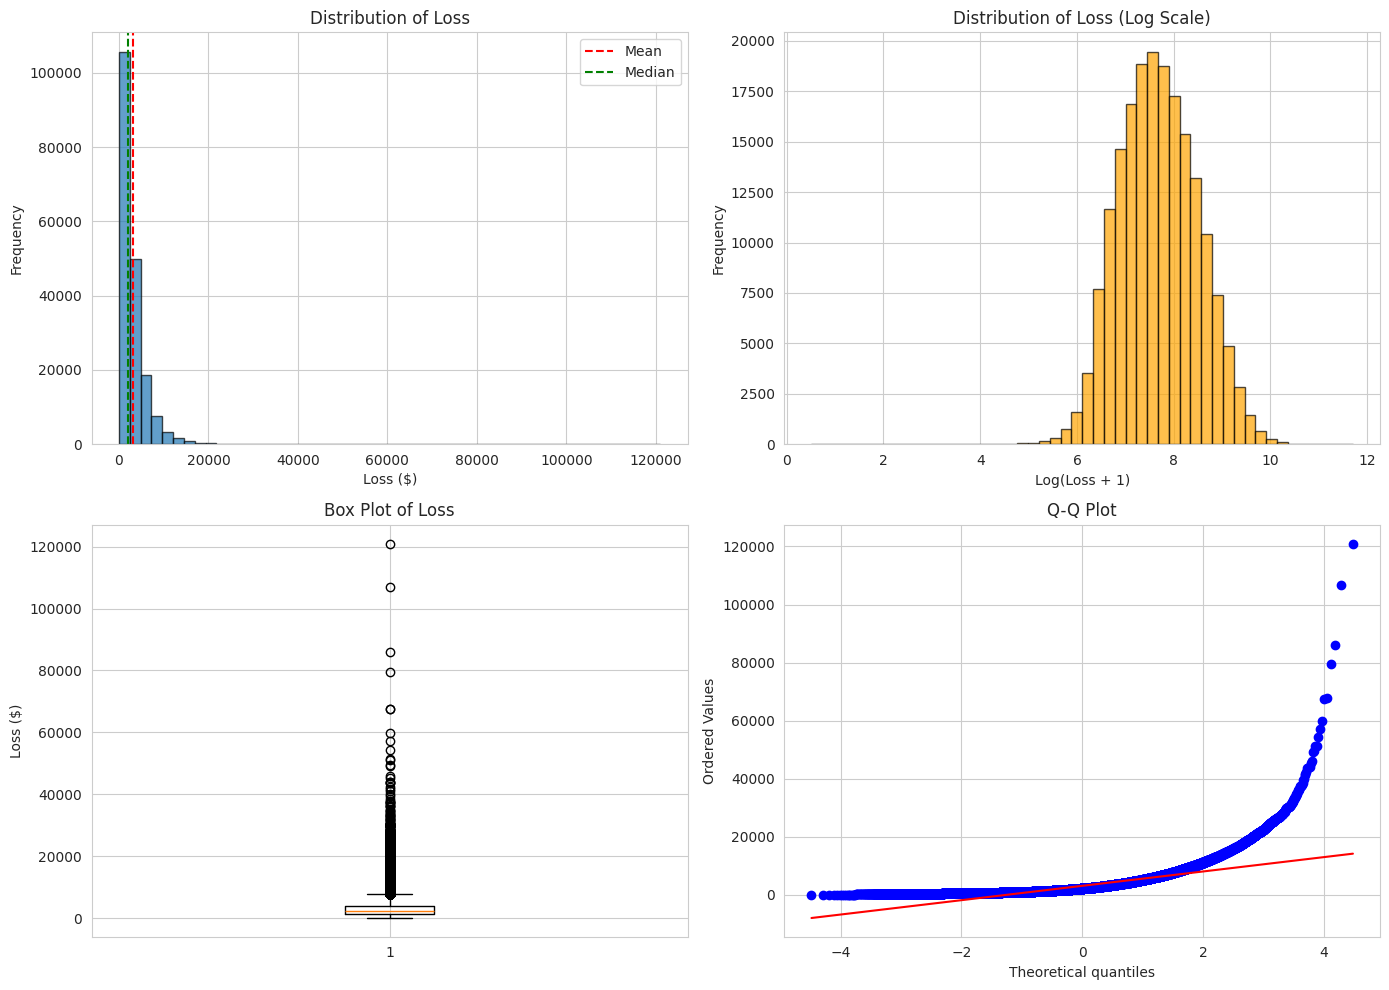

Saved: target_analysis.png


In [6]:
# ============================================================================
# PHASE 3: TARGET ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("PHASE 3: TARGET VARIABLE (LOSS)")
print("="*80)

loss = df['loss']
print(f"\nSummary Statistics:")
print(f"   Mean: ${loss.mean():,.2f}")
print(f"   Median: ${loss.median():,.2f}")
print(f"   Std: ${loss.std():,.2f}")
print(f"   Min: ${loss.min():,.2f}")
print(f"   Max: ${loss.max():,.2f}")
print(f"   Skewness: {loss.skew():.4f}")
print(f"   Zero losses: {(loss == 0).sum():,} ({(loss == 0).sum()/len(loss)*100:.2f}%)")

# Plot target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(loss, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Loss ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Loss')
axes[0, 0].axvline(loss.mean(), color='red', linestyle='--', label=f'Mean')
axes[0, 0].axvline(loss.median(), color='green', linestyle='--', label=f'Median')
axes[0, 0].legend()

axes[0, 1].hist(np.log1p(loss), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Log(Loss + 1)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Loss (Log Scale)')

axes[1, 0].boxplot(loss, vert=True)
axes[1, 0].set_ylabel('Loss ($)')
axes[1, 0].set_title('Box Plot of Loss')

stats.probplot(loss, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.savefig('target_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved: target_analysis.png")


PHASE 4: CATEGORICAL FEATURES

 Cardinality Summary:
   Min: 2
   Max: 326
   Mean: 9.82
   Median: 2

 Low cardinality (≤5): 91
 Medium cardinality (6-20): 19
 High cardinality (>20): 6

 Top 10 Highest Cardinality:
        Unique_Values
cat116            326
cat110            131
cat109             84
cat113             61
cat112             51
cat115             23
cat105             20
cat107             20
cat101             19
cat114             19


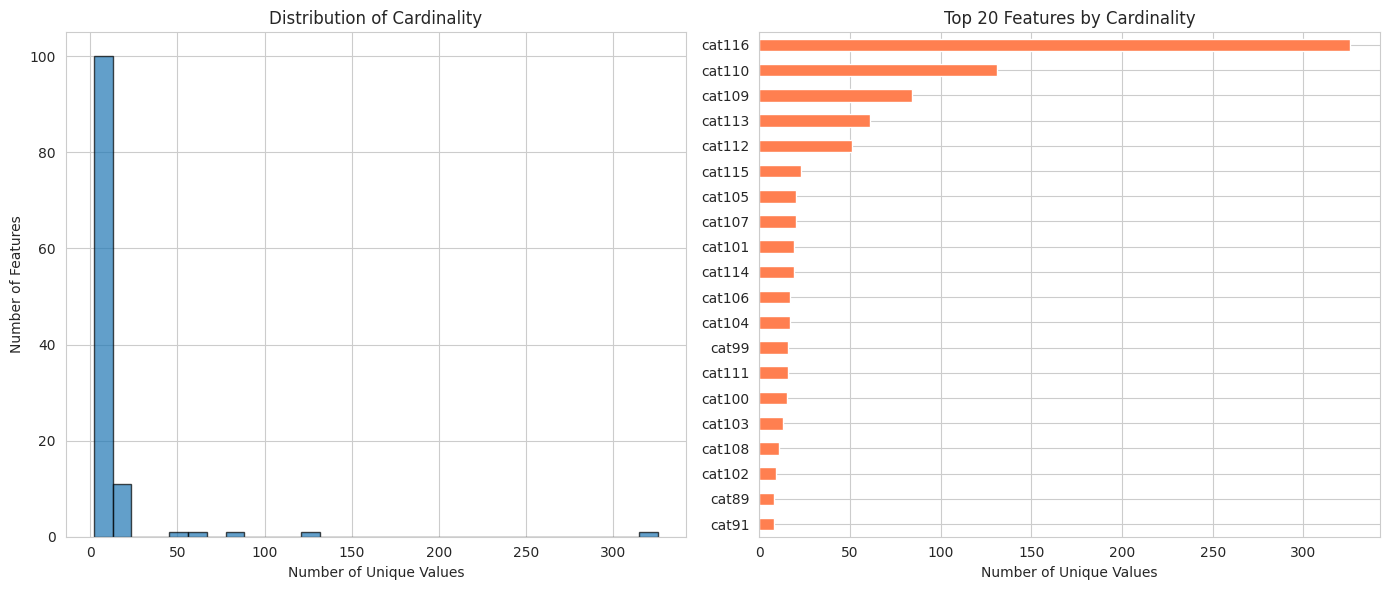

 Saved: categorical_cardinality.png


In [7]:
# ============================================================================
# PHASE 4: CATEGORICAL FEATURES
# ============================================================================
print("\n" + "="*80)
print("PHASE 4: CATEGORICAL FEATURES")
print("="*80)

cardinality = {col: df[col].nunique() for col in cat_cols}
cardinality_df = pd.DataFrame.from_dict(cardinality, orient='index', columns=['Unique_Values'])
cardinality_df = cardinality_df.sort_values('Unique_Values', ascending=False)

print(f"\n Cardinality Summary:")
print(f"   Min: {cardinality_df['Unique_Values'].min()}")
print(f"   Max: {cardinality_df['Unique_Values'].max()}")
print(f"   Mean: {cardinality_df['Unique_Values'].mean():.2f}")
print(f"   Median: {cardinality_df['Unique_Values'].median():.0f}")

low_card = cardinality_df[cardinality_df['Unique_Values'] <= 5]
med_card = cardinality_df[(cardinality_df['Unique_Values'] > 5) & (cardinality_df['Unique_Values'] <= 20)]
high_card = cardinality_df[cardinality_df['Unique_Values'] > 20]

print(f"\n Low cardinality (≤5): {len(low_card)}")
print(f" Medium cardinality (6-20): {len(med_card)}")
print(f" High cardinality (>20): {len(high_card)}")

print("\n Top 10 Highest Cardinality:")
print(cardinality_df.head(10))

# Plot cardinality
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(cardinality_df['Unique_Values'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Unique Values')
axes[0].set_ylabel('Number of Features')
axes[0].set_title('Distribution of Cardinality')

cardinality_df.head(20).plot(kind='barh', ax=axes[1], legend=False, color='coral')
axes[1].set_xlabel('Number of Unique Values')
axes[1].set_title('Top 20 Features by Cardinality')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('categorical_cardinality.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: categorical_cardinality.png")

In [8]:
# ============================================================================
# PHASE 5: CONTINUOUS FEATURES
# ============================================================================
print("\n" + "="*80)
print("PHASE 5: CONTINUOUS FEATURES")
print("="*80)

print(f"\n Summary Statistics:")
print(df[cont_cols].describe().round(4))

corr_matrix = df[cont_cols].corr()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print(f"\n Found {len(high_corr_pairs)} highly correlated pairs (|r| > 0.7):")
    for feat1, feat2, corr in high_corr_pairs:
        print(f"   {feat1} ↔ {feat2}: {corr:.4f}")
else:
    print("\n No highly correlated pairs found")




PHASE 5: CONTINUOUS FEATURES

 Summary Statistics:
             cont1        cont2        cont3        cont4        cont5  \
count  188318.0000  188318.0000  188318.0000  188318.0000  188318.0000   
mean        0.4939       0.5072       0.4989       0.4918       0.4874   
std         0.1876       0.2072       0.2021       0.2113       0.2090   
min         0.0000       0.0011       0.0026       0.1769       0.2811   
25%         0.3461       0.3583       0.3370       0.3274       0.2811   
50%         0.4758       0.5558       0.5280       0.4529       0.4223   
75%         0.6239       0.6818       0.6342       0.6521       0.6433   
max         0.9850       0.8627       0.9443       0.9543       0.9837   

             cont6        cont7        cont8        cont9       cont10  \
count  188318.0000  188318.0000  188318.0000  188318.0000  188318.0000   
mean        0.4909       0.4850       0.4864       0.4855       0.4981   
std         0.2053       0.1785       0.1994       0.1817  

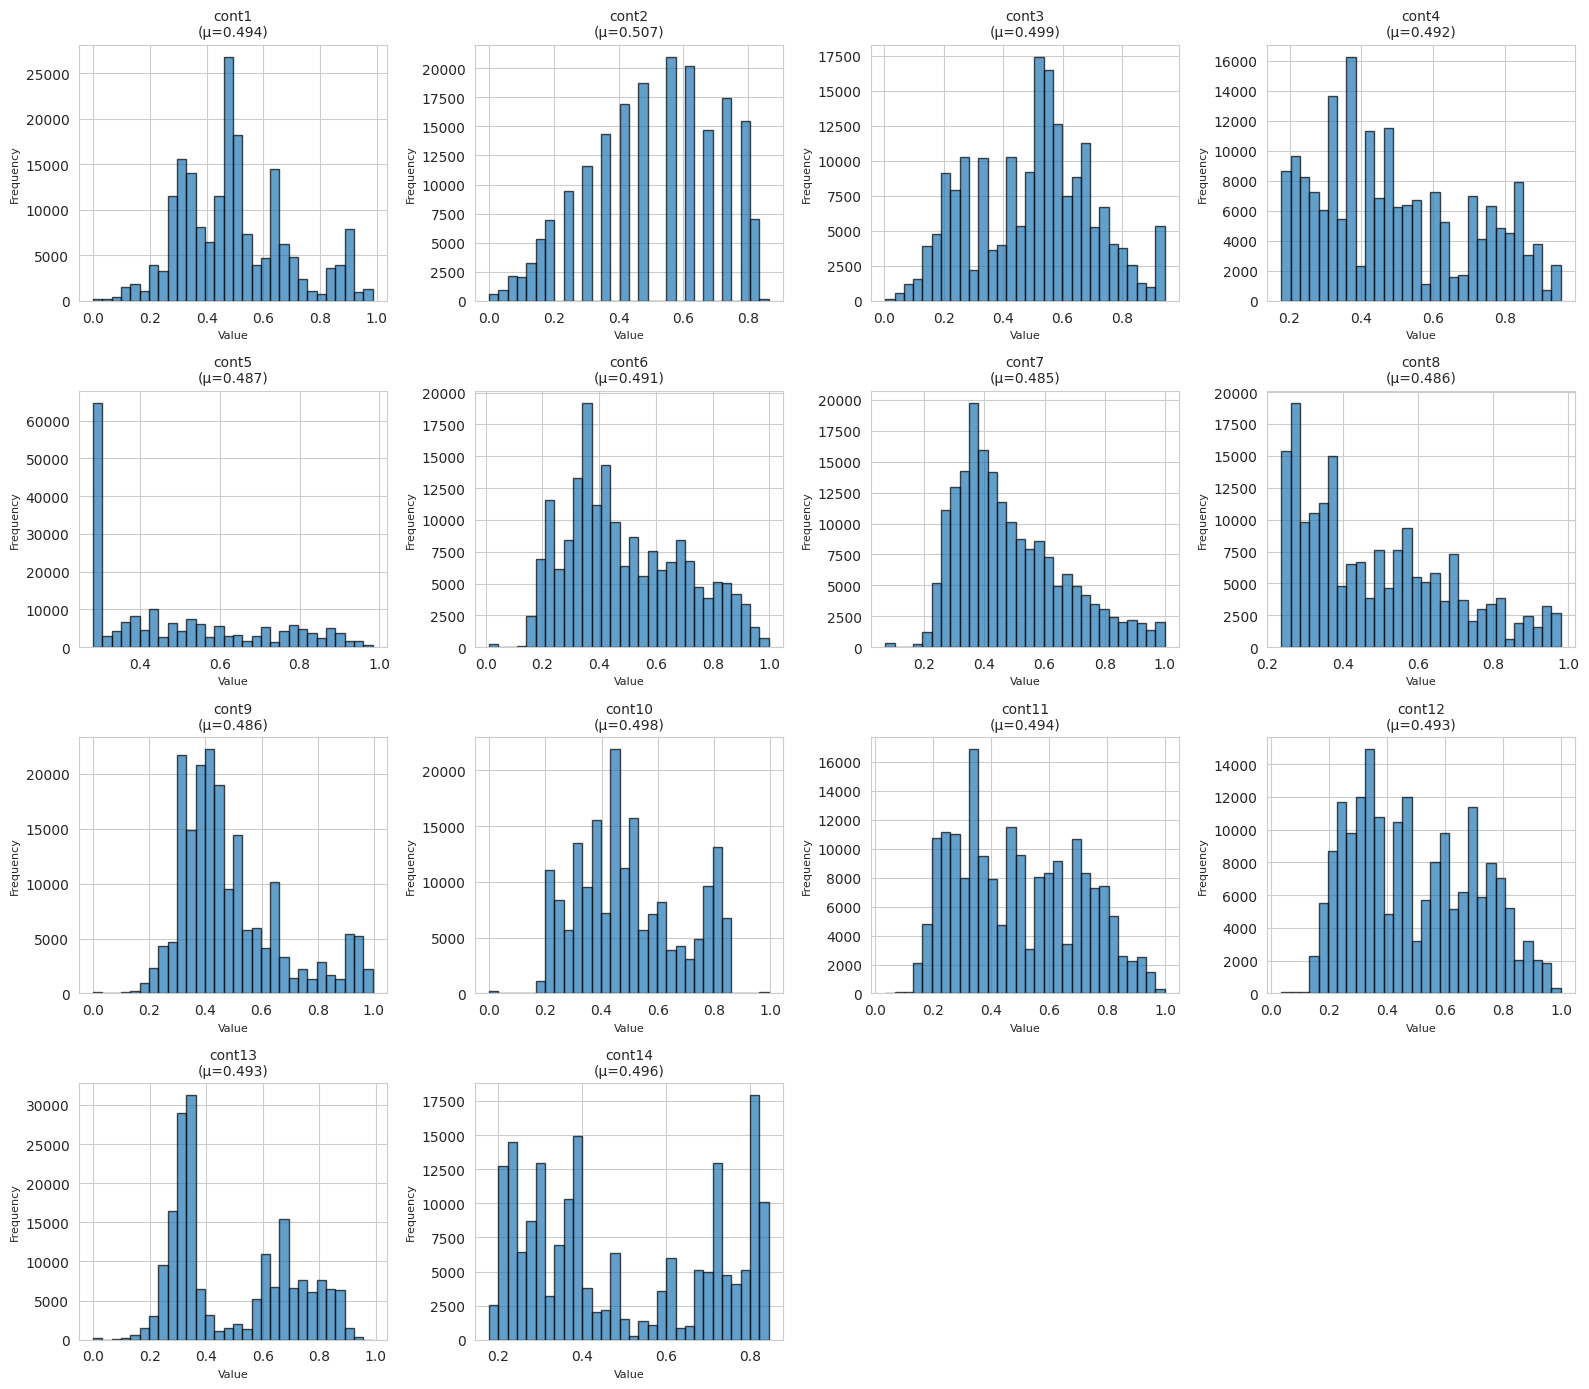

 Saved: continuous_distributions.png


In [9]:
# Plot distributions
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(cont_cols):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}\n(μ={df[col].mean():.3f})', fontsize=10)
    axes[idx].set_xlabel('Value', fontsize=8)
    axes[idx].set_ylabel('Frequency', fontsize=8)

for idx in range(len(cont_cols), 16):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('continuous_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: continuous_distributions.png")

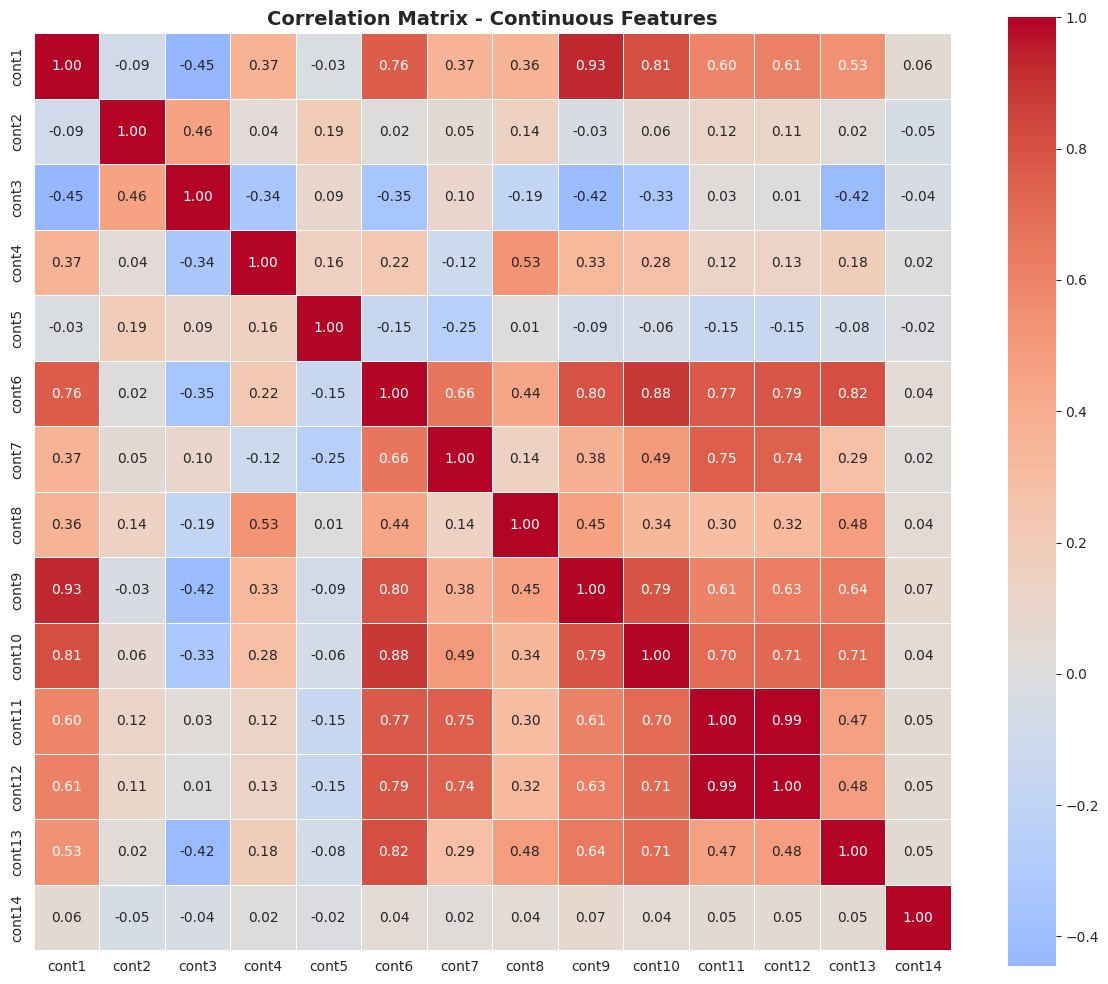

 Saved: correlation_heatmap.png


In [10]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix - Continuous Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: correlation_heatmap.png")


PHASE 6: FEATURE-TARGET RELATIONSHIPS

 Continuous Features vs Loss:
cont2     0.141528
cont7     0.119799
cont3     0.111053
cont11    0.099806
cont12    0.098724
cont6     0.040967
cont8     0.030508
cont10    0.020236
cont14    0.019298
cont9     0.014456
cont13   -0.004022
cont1    -0.010237
cont5    -0.011355
cont4    -0.035831
Name: loss, dtype: float64


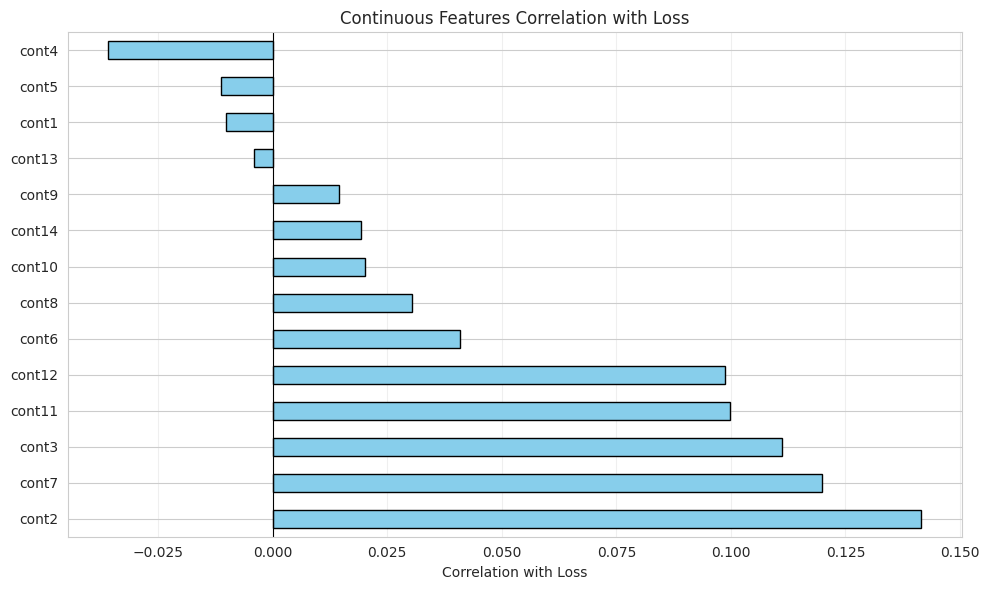

 Saved: feature_target_correlation.png


In [11]:
# ============================================================================
# PHASE 6: FEATURE-TARGET RELATIONSHIPS
# ============================================================================
print("\n" + "="*80)
print("PHASE 6: FEATURE-TARGET RELATIONSHIPS")
print("="*80)

cont_target_corr = df[cont_cols + ['loss']].corr()['loss'].drop('loss').sort_values(ascending=False)
print("\n Continuous Features vs Loss:")
print(cont_target_corr)

# Plot correlation
plt.figure(figsize=(10, 6))
cont_target_corr.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Correlation with Loss')
plt.title('Continuous Features Correlation with Loss')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: feature_target_correlation.png")



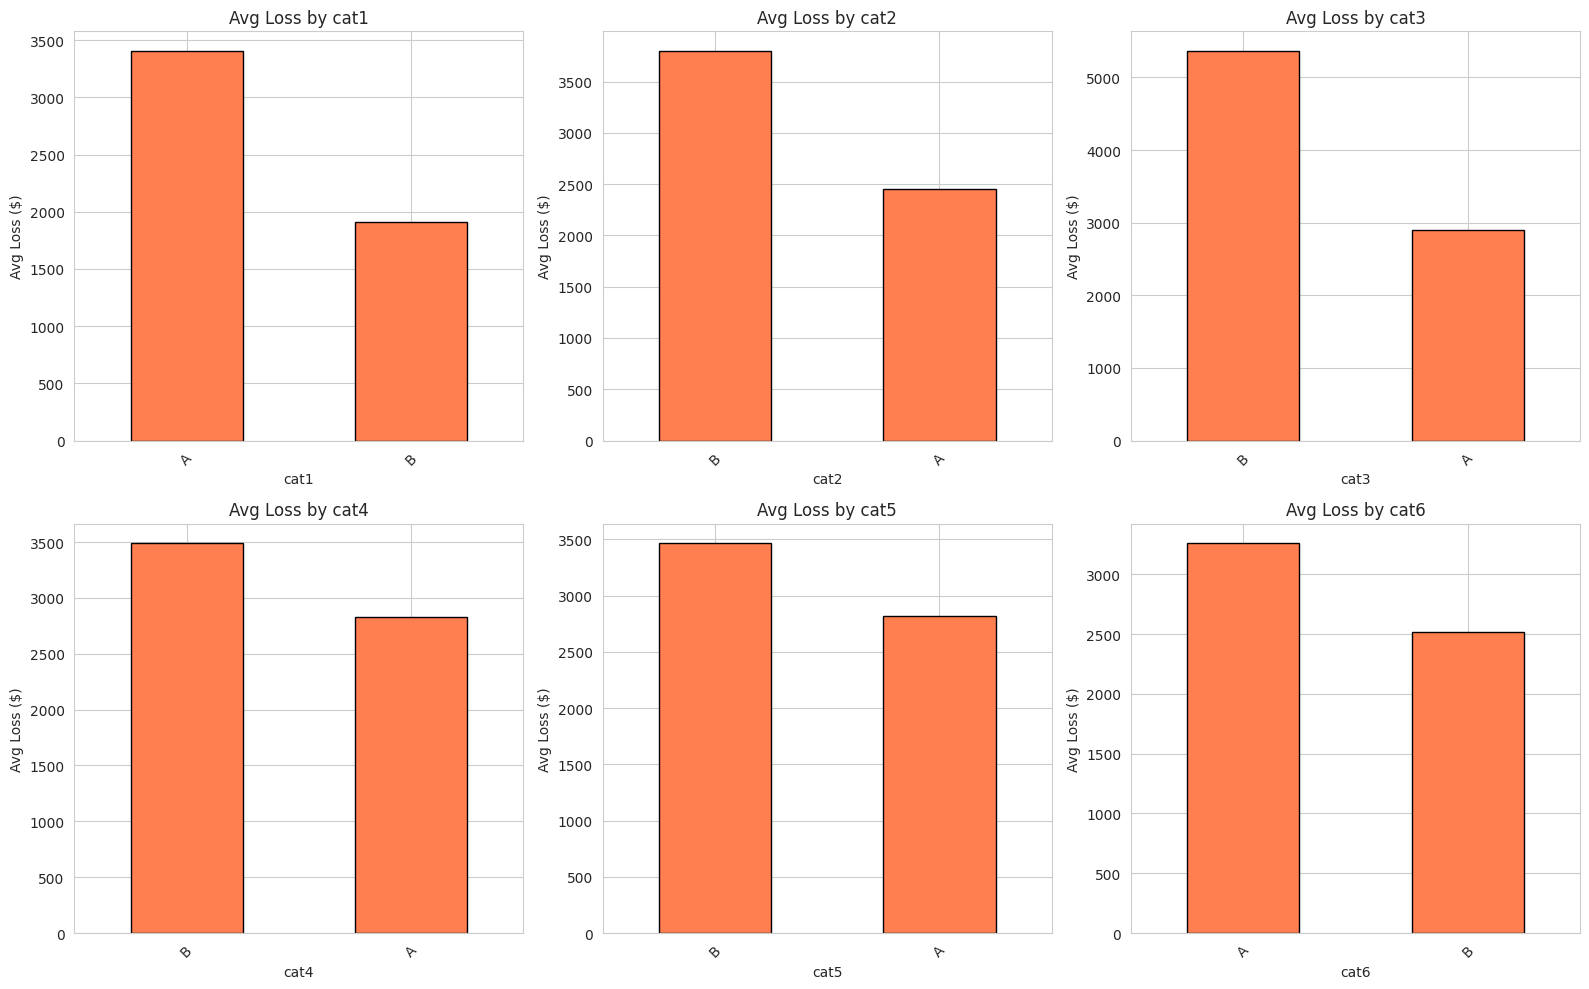

 Saved: categorical_target_relationship.png


In [12]:
# Categorical vs target
low_card_features = [col for col in cat_cols if df[col].nunique() <= 10][:6]

if len(low_card_features) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.ravel()

    for idx, col in enumerate(low_card_features):
        avg_loss = df.groupby(col)['loss'].mean().sort_values(ascending=False)
        avg_loss.plot(kind='bar', ax=axes[idx], color='coral', edgecolor='black')
        axes[idx].set_title(f'Avg Loss by {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Avg Loss ($)')
        axes[idx].tick_params(axis='x', rotation=45)

    for idx in range(len(low_card_features), 6):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.savefig('categorical_target_relationship.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(" Saved: categorical_target_relationship.png")


In [13]:
# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("✅ EDA COMPLETE!")
print("="*80)
print("\n📁 Generated 6 PNG files (check left sidebar)")
print(f"\n📊 Dataset: {len(df):,} rows, {len(cat_cols)} categorical, {len(cont_cols)} continuous")
print(f"💰 Mean loss: ${df['loss'].mean():,.2f}, Median: ${df['loss'].median():,.2f}")
print("\n🚀 Next: Create frequency target and prepare for modeling")
print("="*80)


✅ EDA COMPLETE!

📁 Generated 6 PNG files (check left sidebar)

📊 Dataset: 188,318 rows, 116 categorical, 14 continuous
💰 Mean loss: $3,037.34, Median: $2,115.57

🚀 Next: Create frequency target and prepare for modeling


PHASE 2: PREPROCESSING & DUAL BASELINE MODELS

Baseline Strategy:
  1. Gamma GLM (Traditional Actuarial Approach)
  2. XGBoost (Modern Machine Learning Approach)
  3. Phase 3: NeurFS (Deep Learning - Our Target)

STEP 1: TARGET TRANSFORMATION

Original loss statistics:
  Mean:     $3,037.34
  Median:   $2,115.57
  Std Dev:  $2,904.09
  Skewness: 3.79
  Min:      $0.67
  Max:      $121,012.25

Log-transformed loss statistics:
  Mean:     7.6859
  Median:   7.6576
  Std Dev:  0.8113
  Skewness: 0.10


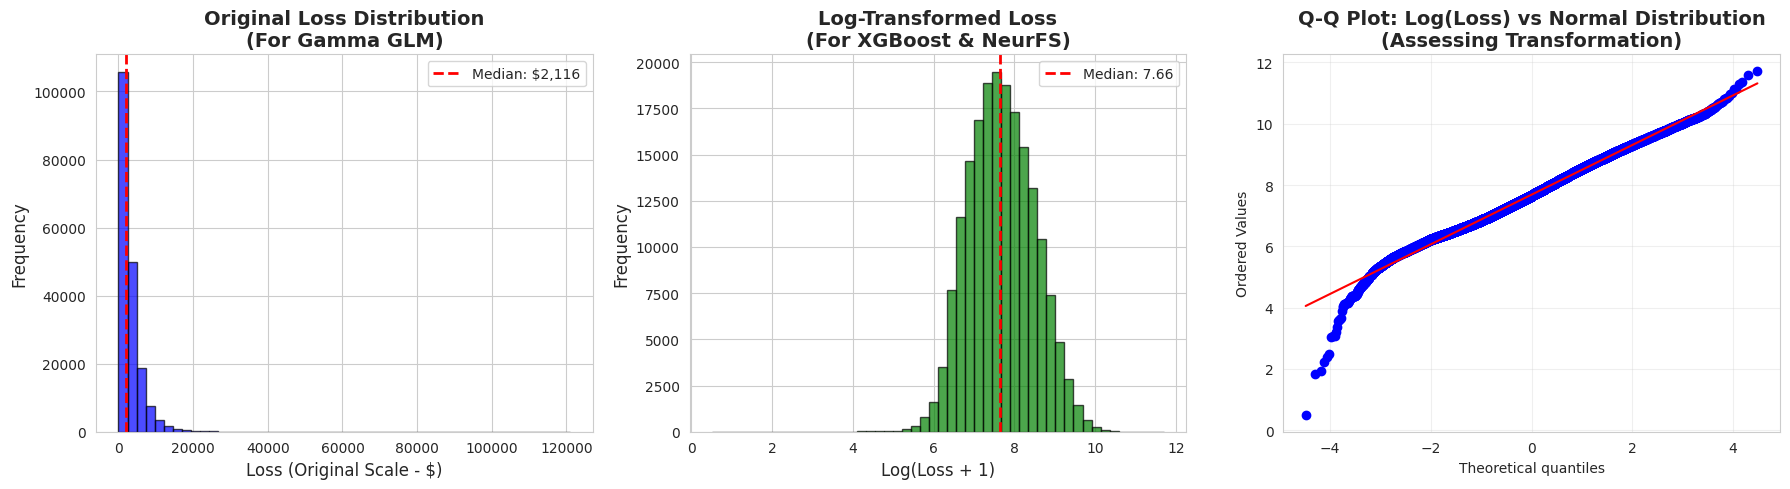


✅ Target transformation complete!
   Skewness reduced: 3.79 → 0.10


In [14]:
# ================================================================================
# PHASE 2: PREPROCESSING & DUAL BASELINE MODELS
# ================================================================================
# Comprehensive baseline comparison: Gamma (TWEEDIE) GLM (Actuarial) + XGBoost (ML)


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
import matplotlib
matplotlib.use('inline')
plt.rcParams['figure.figsize'] = (15, 5)

print("="*80)
print("PHASE 2: PREPROCESSING & DUAL BASELINE MODELS")
print("="*80)
print("\nBaseline Strategy:")
print("  1. Gamma GLM (Traditional Actuarial Approach)")
print("  2. XGBoost (Modern Machine Learning Approach)")
print("  3. Phase 3: NeurFS (Deep Learning - Our Target)")

# ================================================================================
# STEP 1: TARGET TRANSFORMATION
# ================================================================================
print("\n" + "="*80)
print("STEP 1: TARGET TRANSFORMATION")
print("="*80)

# For Gamma GLM: Use original scale (Gamma distribution handles positive skewed data)
# For XGBoost & NeurFS: Use log transformation

df['log_loss'] = np.log1p(df['loss'])

print(f"\nOriginal loss statistics:")
print(f"  Mean:     ${df['loss'].mean():,.2f}")
print(f"  Median:   ${df['loss'].median():,.2f}")
print(f"  Std Dev:  ${df['loss'].std():,.2f}")
print(f"  Skewness: {df['loss'].skew():.2f}")
print(f"  Min:      ${df['loss'].min():,.2f}")
print(f"  Max:      ${df['loss'].max():,.2f}")

print(f"\nLog-transformed loss statistics:")
print(f"  Mean:     {df['log_loss'].mean():.4f}")
print(f"  Median:   {df['log_loss'].median():.4f}")
print(f"  Std Dev:  {df['log_loss'].std():.4f}")
print(f"  Skewness: {df['log_loss'].skew():.2f}")

# Visualize transformation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original distribution
axes[0].hist(df['loss'], bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0].set_xlabel('Loss (Original Scale - $)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Original Loss Distribution\n(For Gamma GLM)', fontsize=14, fontweight='bold')
axes[0].axvline(df['loss'].median(), color='red', linestyle='--', linewidth=2,
                label=f'Median: ${df["loss"].median():,.0f}')
axes[0].legend(fontsize=10)

# Log-transformed distribution
axes[1].hist(df['log_loss'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('Log(Loss + 1)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Log-Transformed Loss\n(For XGBoost & NeurFS)', fontsize=14, fontweight='bold')
axes[1].axvline(df['log_loss'].median(), color='red', linestyle='--', linewidth=2,
                label=f'Median: {df["log_loss"].median():.2f}')
axes[1].legend(fontsize=10)

# Q-Q plot for normality assessment (after log transform)
from scipy import stats
stats.probplot(df['log_loss'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot: Log(Loss) vs Normal Distribution\n(Assessing Transformation)',
                  fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("\n✅ Target transformation complete!")
print(f"   Skewness reduced: {df['loss'].skew():.2f} → {df['log_loss'].skew():.2f}")



In [15]:
# ================================================================================
# STEP 2: FEATURE ENCODING
# ================================================================================
print("\n" + "="*80)
print("STEP 2: FEATURE ENCODING")
print("="*80)

# Identify features
cat_cols = [col for col in df.columns if col.startswith('cat')]
cont_cols = [col for col in df.columns if col.startswith('cont')]

print(f"\nFeature inventory:")
print(f"  Categorical: {len(cat_cols)} features")
print(f"  Continuous:  {len(cont_cols)} features")

# Analyze cardinality
cat_cardinality = {col: df[col].nunique() for col in cat_cols}
low_card = [col for col, card in cat_cardinality.items() if card <= 5]
med_card = [col for col, card in cat_cardinality.items() if 5 < card <= 20]
high_card = [col for col, card in cat_cardinality.items() if card > 20]

print(f"\nCardinality distribution:")
print(f"  Low (≤5):      {len(low_card)} features")
print(f"  Medium (6-20): {len(med_card)} features")
print(f"  High (>20):    {len(high_card)} features")

print(f"\nHigh-cardinality features (perfect for embeddings in NeurFS):")
for col in high_card:
    print(f"  • {col}: {cat_cardinality[col]} unique values")

# Label encoding for tree-based models (XGBoost)
print("\n🔄 Encoding categorical features (Label Encoding)...")
df_encoded = df.copy()
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print("✅ Categorical encoding complete!")

# Handle multicollinearity in continuous features
print("\n🔍 Multicollinearity check (continuous features)...")
corr_matrix = df[cont_cols].corr()

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            high_corr_pairs.append((corr_matrix.columns[i],
                                   corr_matrix.columns[j],
                                   corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print(f"⚠️  Found {len(high_corr_pairs)} highly correlated pairs (|r| > 0.9):")
    for col1, col2, corr_val in high_corr_pairs:
        print(f"  • {col1} ↔ {col2}: r = {corr_val:.4f}")

    # Drop redundant features
    cols_to_drop = list(set([pair[1] for pair in high_corr_pairs]))
    print(f"\n🗑️  Dropping {len(cols_to_drop)} redundant features: {cols_to_drop}")
    df_encoded = df_encoded.drop(columns=cols_to_drop)
    cont_cols = [col for col in cont_cols if col not in cols_to_drop]
else:
    print("✅ No problematic multicollinearity detected!")

print(f"\n✅ Feature engineering complete!")
print(f"   Final feature count: {len(cat_cols) + len(cont_cols)}")




STEP 2: FEATURE ENCODING

Feature inventory:
  Categorical: 116 features
  Continuous:  14 features

Cardinality distribution:
  Low (≤5):      91 features
  Medium (6-20): 19 features
  High (>20):    6 features

High-cardinality features (perfect for embeddings in NeurFS):
  • cat109: 84 unique values
  • cat110: 131 unique values
  • cat112: 51 unique values
  • cat113: 61 unique values
  • cat115: 23 unique values
  • cat116: 326 unique values

🔄 Encoding categorical features (Label Encoding)...
✅ Categorical encoding complete!

🔍 Multicollinearity check (continuous features)...
⚠️  Found 2 highly correlated pairs (|r| > 0.9):
  • cont1 ↔ cont9: r = 0.9299
  • cont11 ↔ cont12: r = 0.9944

🗑️  Dropping 2 redundant features: ['cont12', 'cont9']

✅ Feature engineering complete!
   Final feature count: 128


In [16]:
# ================================================================================
# STEP 3: TRAIN/VALIDATION/TEST SPLIT
# ================================================================================
print("\n" + "="*80)
print("STEP 3: DATA SPLITTING (60/20/20)")
print("="*80)

feature_cols = cat_cols + cont_cols

# Prepare feature matrices and targets
X = df_encoded[feature_cols]
y_original = df_encoded['loss']        # For Gamma GLM
y_log = df_encoded['log_loss']         # For XGBoost

print(f"\nData dimensions:")
print(f"  Feature matrix: {X.shape}")
print(f"  Target (original): {y_original.shape}")
print(f"  Target (log): {y_log.shape}")

# Split 1: 80% temp, 20% test
X_temp, X_test, y_orig_temp, y_orig_test, y_log_temp, y_log_test = train_test_split(
    X, y_original, y_log, test_size=0.2, random_state=42, shuffle=True
)

# Split 2: 75% train, 25% val (from temp → 60/20 overall)
X_train, X_val, y_orig_train, y_orig_val, y_log_train, y_log_val = train_test_split(
    X_temp, y_orig_temp, y_log_temp, test_size=0.25, random_state=42, shuffle=True
)

print(f"\n📦 Data splits:")
print(f"  Training:   {X_train.shape[0]:>7,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Validation: {X_val.shape[0]:>7,} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  Test:       {X_test.shape[0]:>7,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n📊 Target distribution check:")
print(f"  Train  - Original: ${y_orig_train.mean():>8,.2f}, Log: {y_log_train.mean():>6.4f}")
print(f"  Val    - Original: ${y_orig_val.mean():>8,.2f}, Log: {y_log_val.mean():>6.4f}")
print(f"  Test   - Original: ${y_orig_test.mean():>8,.2f}, Log: {y_log_test.mean():>6.4f}")
print("✅ Splits are well-balanced!")




STEP 3: DATA SPLITTING (60/20/20)

Data dimensions:
  Feature matrix: (188318, 128)
  Target (original): (188318,)
  Target (log): (188318,)

📦 Data splits:
  Training:   112,990 samples (60.0%)
  Validation:  37,664 samples (20.0%)
  Test:        37,664 samples (20.0%)

📊 Target distribution check:
  Train  - Original: $3,036.02, Log: 7.6850
  Val    - Original: $3,050.47, Log: 7.6878
  Test   - Original: $3,028.16, Log: 7.6868
✅ Splits are well-balanced!


In [17]:
# ================================================================================
# STEP 4A: BASELINE 1 - TWEEDIE GLM (ACTUARIAL STANDARD)
# ================================================================================
print("\n" + "="*80)
print("BASELINE 1: TWEEDIE GLM (Actuarial Standard for Insurance)")
print("="*80)

print("\n🎯 Model Specification:")
print("  • Distribution: Tweedie (power=1.5, between Poisson and Gamma)")
print("  • Link Function: Log")
print("  • Theory: Tweedie naturally handles right-skewed insurance claims")
print("  • Actuarial Standard: Preferred for insurance severity modeling")
print("\n📚 Note: Tweedie is a generalization of Gamma that's more robust")
print("         for insurance data with zeros and extreme skewness")

# Use sklearn's TweedieRegressor (more robust than statsmodels for this data)
from sklearn.linear_model import TweedieRegressor

print("\n⏳ Training Tweedie GLM...")
print("   (This may take 2-3 minutes)")

# Tweedie GLM with log link (power=1.5 is between Poisson and Gamma)
tweedie_glm = TweedieRegressor(
    power=1.5,           # Between Poisson (1) and Gamma (2)
    alpha=0.1,           # L2 regularization
    link='log',          # Log link function
    max_iter=300,        # Maximum iterations
    tol=1e-4,           # Convergence tolerance
    verbose=1
)

tweedie_glm.fit(X_train, y_orig_train)

print("\n✅ Tweedie GLM training complete!")

# Make predictions
print("\n🔮 Generating predictions...")
glm_train_pred = tweedie_glm.predict(X_train)
glm_val_pred = tweedie_glm.predict(X_val)
glm_test_pred = tweedie_glm.predict(X_test)

# Ensure predictions are positive (GLM should guarantee this, but just in case)
glm_train_pred = np.maximum(glm_train_pred, 0.01)
glm_val_pred = np.maximum(glm_val_pred, 0.01)
glm_test_pred = np.maximum(glm_test_pred, 0.01)

# Calculate metrics
def calculate_metrics(y_true, y_pred, model_name, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{model_name} - {dataset_name} Set:")
    print(f"  MAE:   ${mae:>10,.2f}")
    print(f"  RMSE:  ${rmse:>10,.2f}")
    print(f"  R²:    {r2:>11.4f}")
    print(f"  MAPE:  {mape:>10.2f}%")

    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

glm_train_metrics = calculate_metrics(y_orig_train, glm_train_pred, "Tweedie GLM", "Training")
glm_val_metrics = calculate_metrics(y_orig_val, glm_val_pred, "Tweedie GLM", "Validation")
glm_test_metrics = calculate_metrics(y_orig_test, glm_test_pred, "Tweedie GLM", "Test")

# Overfitting check
train_val_diff = abs(glm_train_metrics['MAE'] - glm_val_metrics['MAE'])
print(f"\n🔍 Overfitting Check: Train-Val MAE difference = ${train_val_diff:.2f}")
if train_val_diff < 100:
    print("   ✅ Excellent - No overfitting")
elif train_val_diff < 300:
    print("   ⚠️  Moderate overfitting")
else:
    print("   ❌ Significant overfitting detected")




BASELINE 1: TWEEDIE GLM (Actuarial Standard for Insurance)

🎯 Model Specification:
  • Distribution: Tweedie (power=1.5, between Poisson and Gamma)
  • Link Function: Log
  • Theory: Tweedie naturally handles right-skewed insurance claims
  • Actuarial Standard: Preferred for insurance severity modeling

📚 Note: Tweedie is a generalization of Gamma that's more robust
         for insurance data with zeros and extreme skewness

⏳ Training Tweedie GLM...
   (This may take 2-3 minutes)

✅ Tweedie GLM training complete!

🔮 Generating predictions...

Tweedie GLM - Training Set:
  MAE:   $  1,331.11
  RMSE:  $  2,644.18
  R²:         0.1637
  MAPE:       71.34%

Tweedie GLM - Validation Set:
  MAE:   $  1,335.28
  RMSE:  $  2,241.76
  R²:         0.4371
  MAPE:       68.63%

Tweedie GLM - Test Set:
  MAE:   $  1,321.84
  RMSE:  $  2,159.44
  R²:         0.4285
  MAPE:       66.95%

🔍 Overfitting Check: Train-Val MAE difference = $4.17
   ✅ Excellent - No overfitting


In [18]:
# ================================================================================
# STEP 4B: BASELINE 2 - XGBOOST (MODERN ML)
# ================================================================================
print("\n" + "="*80)
print("BASELINE 2: XGBOOST (Modern Machine Learning Approach)")
print("="*80)

print("\n🎯 Model Specification:")
print("  • Algorithm: Gradient Boosting Decision Trees")
print("  • Trees: 300")
print("  • Max Depth: 6")
print("  • Learning Rate: 0.05")
print("  • Target: Log-transformed loss (handles skewness)")

print("\n⏳ Training XGBoost...")

xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    eval_metric='mae'
)

# Train with early stopping
eval_set = [(X_train, y_log_train), (X_val, y_log_val)]
xgb_model.fit(
    X_train, y_log_train,
    eval_set=eval_set,
    verbose=50
)

print("\n✅ XGBoost training complete!")

# Make predictions (on log scale, then transform back)
print("\n🔮 Generating predictions...")
xgb_train_pred_log = xgb_model.predict(X_train)
xgb_val_pred_log = xgb_model.predict(X_val)
xgb_test_pred_log = xgb_model.predict(X_test)

# Transform back to original scale
xgb_train_pred = np.expm1(xgb_train_pred_log)
xgb_val_pred = np.expm1(xgb_val_pred_log)
xgb_test_pred = np.expm1(xgb_test_pred_log)

# Calculate metrics
xgb_train_metrics = calculate_metrics(y_orig_train, xgb_train_pred, "XGBoost", "Training")
xgb_val_metrics = calculate_metrics(y_orig_val, xgb_val_pred, "XGBoost", "Validation")
xgb_test_metrics = calculate_metrics(y_orig_test, xgb_test_pred, "XGBoost", "Test")

# Overfitting check
train_val_diff = abs(xgb_train_metrics['MAE'] - xgb_val_metrics['MAE'])
print(f"\n🔍 Overfitting Check: Train-Val MAE difference = ${train_val_diff:.2f}")
if train_val_diff < 100:
    print("   ✅ Excellent - No overfitting")
elif train_val_diff < 300:
    print("   ⚠️  Moderate overfitting")
else:
    print("   ❌ Significant overfitting detected")




BASELINE 2: XGBOOST (Modern Machine Learning Approach)

🎯 Model Specification:
  • Algorithm: Gradient Boosting Decision Trees
  • Trees: 300
  • Max Depth: 6
  • Learning Rate: 0.05
  • Target: Log-transformed loss (handles skewness)

⏳ Training XGBoost...
[0]	validation_0-mae:0.64537	validation_1-mae:0.64893
[50]	validation_0-mae:0.45033	validation_1-mae:0.45736
[100]	validation_0-mae:0.42370	validation_1-mae:0.43428
[150]	validation_0-mae:0.41351	validation_1-mae:0.42721
[200]	validation_0-mae:0.40796	validation_1-mae:0.42409
[250]	validation_0-mae:0.40379	validation_1-mae:0.42239
[299]	validation_0-mae:0.40041	validation_1-mae:0.42125

✅ XGBoost training complete!

🔮 Generating predictions...

XGBoost - Training Set:
  MAE:   $  1,090.74
  RMSE:  $  1,804.33
  R²:         0.6106
  MAPE:       47.06%

XGBoost - Validation Set:
  MAE:   $  1,169.46
  RMSE:  $  2,068.99
  R²:         0.5205
  MAPE:       49.29%

XGBoost - Test Set:
  MAE:   $  1,144.87
  RMSE:  $  1,918.75
  R²:     

In [19]:
# ================================================================================
# STEP 5: BASELINE COMPARISON
# ================================================================================
print("\n" + "="*80)
print("STEP 5: BASELINE MODEL COMPARISON")
print("="*80)

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Tweedie GLM', 'XGBoost'],
    'Test MAE': [glm_test_metrics['MAE'], xgb_test_metrics['MAE']],
    'Test RMSE': [glm_test_metrics['RMSE'], xgb_test_metrics['RMSE']],
    'Test R²': [glm_test_metrics['R2'], xgb_test_metrics['R2']],
    'Test MAPE': [glm_test_metrics['MAPE'], xgb_test_metrics['MAPE']]
})

print("\n📊 Test Set Performance Comparison:")
print(comparison_df.to_string(index=False))

# Determine better model
if xgb_test_metrics['MAE'] < glm_test_metrics['MAE']:
    improvement = ((glm_test_metrics['MAE'] - xgb_test_metrics['MAE']) / glm_test_metrics['MAE']) * 100
    print(f"\n🏆 Winner: XGBoost")
    print(f"   • {improvement:.1f}% lower MAE than Tweedie GLM")
    print(f"   • Modern ML beats traditional GLM on this dataset")
else:
    improvement = ((xgb_test_metrics['MAE'] - glm_test_metrics['MAE']) / xgb_test_metrics['MAE']) * 100
    print(f"\n🏆 Winner: Tweedie GLM")
    print(f"   • {improvement:.1f}% lower MAE than XGBoost")
    print(f"   • Traditional approach still competitive!")




STEP 5: BASELINE MODEL COMPARISON

📊 Test Set Performance Comparison:
      Model    Test MAE   Test RMSE  Test R²  Test MAPE
Tweedie GLM 1321.837832 2159.438816 0.428504  66.948251
    XGBoost 1144.865085 1918.750429 0.548801  47.982973

🏆 Winner: XGBoost
   • 13.4% lower MAE than Tweedie GLM
   • Modern ML beats traditional GLM on this dataset



STEP 6: VISUALIZATION DASHBOARD


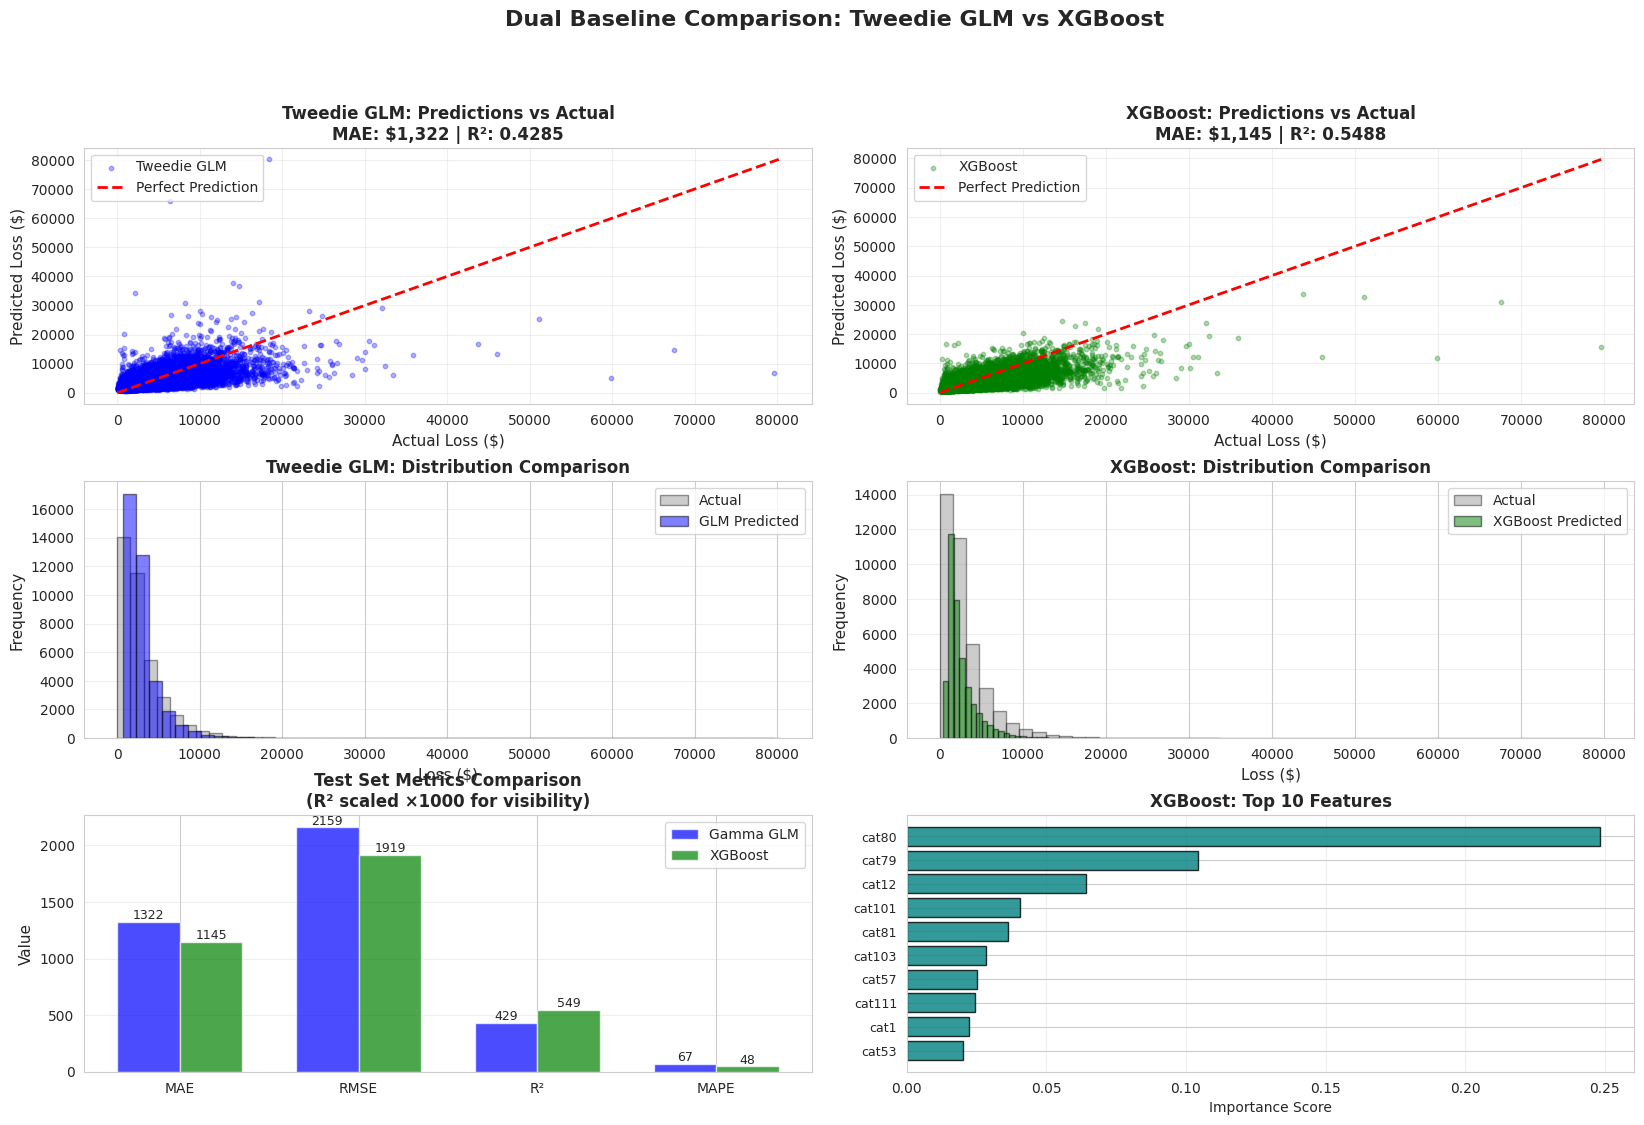


✅ Comprehensive dashboard displayed!


In [20]:
# ================================================================================
# STEP 6: COMPREHENSIVE VISUALIZATIONS
# ================================================================================
print("\n" + "="*80)
print("STEP 6: VISUALIZATION DASHBOARD")
print("="*80)

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# Row 1: Predictions vs Actual (GLM and XGBoost side by side)
ax1 = fig.add_subplot(gs[0, :2])
ax1.scatter(y_orig_test, glm_test_pred, alpha=0.3, s=10, label='Tweedie GLM', color='blue')
max_val = max(y_orig_test.max(), glm_test_pred.max())
ax1.plot([0, max_val], [0, max_val], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Loss ($)', fontsize=11)
ax1.set_ylabel('Predicted Loss ($)', fontsize=11)
ax1.set_title(f'Tweedie GLM: Predictions vs Actual\nMAE: ${glm_test_metrics["MAE"]:,.0f} | R²: {glm_test_metrics["R2"]:.4f}',
              fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2 = fig.add_subplot(gs[0, 2:])
ax2.scatter(y_orig_test, xgb_test_pred, alpha=0.3, s=10, label='XGBoost', color='green')
max_val = max(y_orig_test.max(), xgb_test_pred.max())
ax2.plot([0, max_val], [0, max_val], 'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Loss ($)', fontsize=11)
ax2.set_ylabel('Predicted Loss ($)', fontsize=11)
ax2.set_title(f'XGBoost: Predictions vs Actual\nMAE: ${xgb_test_metrics["MAE"]:,.0f} | R²: {xgb_test_metrics["R2"]:.4f}',
              fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Row 2: Distribution Comparison
ax3 = fig.add_subplot(gs[1, :2])
ax3.hist(y_orig_test, bins=50, alpha=0.4, label='Actual', color='gray', edgecolor='black')
ax3.hist(glm_test_pred, bins=50, alpha=0.5, label='GLM Predicted', color='blue', edgecolor='black')
ax3.set_xlabel('Loss ($)', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('Tweedie GLM: Distribution Comparison', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

ax4 = fig.add_subplot(gs[1, 2:])
ax4.hist(y_orig_test, bins=50, alpha=0.4, label='Actual', color='gray', edgecolor='black')
ax4.hist(xgb_test_pred, bins=50, alpha=0.5, label='XGBoost Predicted', color='green', edgecolor='black')
ax4.set_xlabel('Loss ($)', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.set_title('XGBoost: Distribution Comparison', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# Row 3: Performance Metrics Comparison
ax5 = fig.add_subplot(gs[2, :2])
metrics = ['MAE', 'RMSE', 'R²', 'MAPE']
glm_values = [glm_test_metrics['MAE'], glm_test_metrics['RMSE'],
              glm_test_metrics['R2']*1000, glm_test_metrics['MAPE']]
xgb_values = [xgb_test_metrics['MAE'], xgb_test_metrics['RMSE'],
              xgb_test_metrics['R2']*1000, xgb_test_metrics['MAPE']]

x = np.arange(len(metrics))
width = 0.35

bars1 = ax5.bar(x - width/2, glm_values, width, label='Gamma GLM', color='blue', alpha=0.7)
bars2 = ax5.bar(x + width/2, xgb_values, width, label='XGBoost', color='green', alpha=0.7)

ax5.set_ylabel('Value', fontsize=11)
ax5.set_title('Test Set Metrics Comparison\n(R² scaled ×1000 for visibility)',
              fontsize=12, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(metrics)
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}', ha='center', va='bottom', fontsize=9)

# Row 3: Feature Importance (XGBoost only)
ax6 = fig.add_subplot(gs[2, 2:])
feature_importance = xgb_model.feature_importances_
top_10_idx = np.argsort(feature_importance)[-10:]
top_10_features = [feature_cols[i] for i in top_10_idx]
top_10_scores = feature_importance[top_10_idx]

ax6.barh(range(10), top_10_scores, color='teal', edgecolor='black', alpha=0.8)
ax6.set_yticks(range(10))
ax6.set_yticklabels(top_10_features, fontsize=9)
ax6.set_xlabel('Importance Score', fontsize=10)
ax6.set_title('XGBoost: Top 10 Features', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='x')

plt.suptitle('Dual Baseline Comparison: Tweedie GLM vs XGBoost',
             fontsize=16, fontweight='bold', y=0.995)

plt.show()
print("\n✅ Comprehensive dashboard displayed!")



In [21]:
# ================================================================================
# STEP 7: SAVE RESULTS FOR PHASE 3
# ================================================================================
print("\n" + "="*80)
print("STEP 7: PREPARING FOR PHASE 3 (NeurFS)")
print("="*80)

# Store results for comparison with NeurFS
baseline_results = {
    'tweedie_glm': {
        'test_mae': glm_test_metrics['MAE'],
        'test_rmse': glm_test_metrics['RMSE'],
        'test_r2': glm_test_metrics['R2'],
        'test_mape': glm_test_metrics['MAPE']
    },
    'xgboost': {
        'test_mae': xgb_test_metrics['MAE'],
        'test_rmse': xgb_test_metrics['RMSE'],
        'test_r2': xgb_test_metrics['R2'],
        'test_mape': xgb_test_metrics['MAPE']
    }
}

print("\n📊 Baseline Results Saved:")
print(f"  • Tweedie GLM Test MAE:  ${baseline_results['tweedie_glm']['test_mae']:,.2f}")
print(f"  • XGBoost Test MAE:      ${baseline_results['xgboost']['test_mae']:,.2f}")

print("\n🎯 Target for NeurFS (Phase 3):")
best_mae = min(glm_test_metrics['MAE'], xgb_test_metrics['MAE'])
print(f"  • Beat: ${best_mae:,.2f} (current best MAE)")
print(f"  • Goal: Achieve MAE < ${best_mae * 0.95:,.2f} (5% improvement)")




STEP 7: PREPARING FOR PHASE 3 (NeurFS)

📊 Baseline Results Saved:
  • Tweedie GLM Test MAE:  $1,321.84
  • XGBoost Test MAE:      $1,144.87

🎯 Target for NeurFS (Phase 3):
  • Beat: $1,144.87 (current best MAE)
  • Goal: Achieve MAE < $1,087.62 (5% improvement)


In [22]:
# ================================================================================
# FINAL SUMMARY
# ================================================================================
print("\n" + "="*80)
print("PHASE 2 COMPLETE - SUMMARY")
print("="*80)

print("\n✅ Completed Tasks:")
print("  1. ✓ Target transformation (original + log)")
print("  2. ✓ Feature encoding (116 categorical, 14 continuous)")
print("  3. ✓ Multicollinearity handling")
print("  4. ✓ 60/20/20 data split")
print("  5. ✓ Tweedie GLM baseline (traditional actuarial)")
print("  6. ✓ XGBoost baseline (modern ML)")
print("  7. ✓ Comprehensive evaluation & comparison")

print("\n📊 Best Baseline Performance:")
if xgb_test_metrics['MAE'] < glm_test_metrics['MAE']:
    print(f"  • Winner: XGBoost")
    print(f"  • Test MAE:  ${xgb_test_metrics['MAE']:,.2f}")
    print(f"  • Test R²:   {xgb_test_metrics['R2']:.4f}")
else:
    print(f"  • Winner: Tweedie GLM")
    print(f"  • Test MAE:  ${glm_test_metrics['MAE']:,.2f}")
    print(f"  • Test R²:   {glm_test_metrics['R2']:.4f}")

print("\n🚀 Ready for Phase 3: NeurFS Implementation")
print("   • Baseline benchmarks established")
print("   • Data prepared and split")
print("   • Clear target: Beat both baselines!")

print("\n" + "="*80)


PHASE 2 COMPLETE - SUMMARY

✅ Completed Tasks:
  1. ✓ Target transformation (original + log)
  2. ✓ Feature encoding (116 categorical, 14 continuous)
  3. ✓ Multicollinearity handling
  4. ✓ 60/20/20 data split
  5. ✓ Tweedie GLM baseline (traditional actuarial)
  6. ✓ XGBoost baseline (modern ML)
  7. ✓ Comprehensive evaluation & comparison

📊 Best Baseline Performance:
  • Winner: XGBoost
  • Test MAE:  $1,144.87
  • Test R²:   0.5488

🚀 Ready for Phase 3: NeurFS Implementation
   • Baseline benchmarks established
   • Data prepared and split
   • Clear target: Beat both baselines!



PHASE 3: NEURAL NETWORK FOR SEVERITY PREDICTION

🎯 Objective: Beat XGBoost baseline ($1,144.87 MAE)
🏗️  Architecture: Embeddings + Dense layers (NeurFS-inspired)
📊 Target: Log-transformed loss (predict continuous value)

STEP 1: LOADING DATA FROM PHASE 2

✅ Data already loaded:
  Training:   112,990 samples, 128 features
  Validation: 37,664 samples, 128 features
  Test:       37,664 samples, 128 features

  Target: log_loss (log-transformed)
  Train mean: 7.6850
  Val mean:   7.6878
  Test mean:  7.6868

📋 Feature breakdown:
  Categorical: 116 features
  Continuous:  12 features

🔍 High-cardinality features (will use embeddings):
  • cat116: 326 unique values
  • cat110: 131 unique values
  • cat109: 84 unique values
  • cat113: 61 unique values
  • cat112: 51 unique values
  • cat115: 23 unique values

STEP 2: EMBEDDING DIMENSIONS DESIGN

📐 Embedding dimensions (NeurFS rule: min(50, ⌈cardinality/2⌉)):

High-cardinality features (>20 categories):
  cat116: 326 categories → 50-dim embe

Model: "NeurFS_Severity"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_cat1          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat2          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat3          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat4          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat5          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat6          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat7          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat8          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat9          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat10         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat11         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat12         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat13         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat14         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat15         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat16         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_cat17         │ (None, 1)         │          0 │ -               

 Total params: 100,661 (393.21 KB)

 Trainable params: 100,277 (391.71 KB)

 Non-trainable params: 384 (1.50 KB)


📊 Total parameters: 100,661

STEP 5: PREPARING DATA FOR TRAINING

✅ Data prepared:
  Training:   117 input arrays
    - 116 categorical inputs
    - 1 continuous input
  Total training samples: 112,990

STEP 6: SETTING UP TRAINING CALLBACKS

📌 Callbacks configured:
  • Early Stopping: patience=15 epochs
  • ReduceLROnPlateau: factor=0.5, patience=5
  • ModelCheckpoint: saves best model

STEP 7: TRAINING NEURAL NETWORK

⏳ Training in progress...
   (This may take 5-10 minutes depending on hardware)

--------------------------------------------------------------------------------
Epoch 1/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.4872 - mae: 5.4872 - mse: 38.6179

442/442 ━━━━━━━━━━━━━━━━━━━━ 54s 53ms/step - loss: 5.4826 - mae: 5.4826 - mse: 38.5763 - val_loss: 0.5943 - val_mae: 0.5943 - val_mse: 0.5573 - learning_rate: 0.0010
Epoch 2/100
441/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1659 - mae: 1.1659 - mse: 2.4012

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 1.1654 - mae: 1.1654 - mse: 2.3995 - val_loss: 0.5026 - val_mae: 0.5026 - val_mse: 0.4029 - learning_rate: 0.0010
Epoch 3/100
438/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8674 - mae: 0.8674 - mse: 1.3354

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.8670 - mae: 0.8670 - mse: 1.3340 - val_loss: 0.4525 - val_mae: 0.4525 - val_mse: 0.3344 - learning_rate: 0.0010
Epoch 4/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.7533 - mae: 0.7533 - mse: 0.9568 - val_loss: 0.4648 - val_mae: 0.4648 - val_mse: 0.3509 - learning_rate: 0.0010
Epoch 5/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.6999 - mae: 0.6999 - mse: 0.7958 - val_loss: 0.4530 - val_mae: 0.4530 - val_mse: 0.3367 - learning_rate: 0.0010
Epoch 6/100
439/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6703 - mae: 0.6703 - mse: 0.7167

442/442 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.6702 - mae: 0.6702 - mse: 0.7166 - val_loss: 0.4468 - val_mae: 0.4468 - val_mse: 0.3282 - learning_rate: 0.0010
Epoch 7/100
438/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6456 - mae: 0.6456 - mse: 0.6664

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.6456 - mae: 0.6456 - mse: 0.6663 - val_loss: 0.4350 - val_mae: 0.4350 - val_mse: 0.3130 - learning_rate: 0.0010
Epoch 8/100
439/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6312 - mae: 0.6312 - mse: 0.6369

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.6312 - mae: 0.6312 - mse: 0.6368 - val_loss: 0.4344 - val_mae: 0.4344 - val_mse: 0.3135 - learning_rate: 0.0010
Epoch 9/100
441/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6226 - mae: 0.6226 - mse: 0.6215

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.6226 - mae: 0.6226 - mse: 0.6215 - val_loss: 0.4333 - val_mae: 0.4333 - val_mse: 0.3109 - learning_rate: 0.0010
Epoch 10/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.6168 - mae: 0.6168 - mse: 0.6082 - val_loss: 0.4373 - val_mae: 0.4373 - val_mse: 0.3162 - learning_rate: 0.0010
Epoch 11/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.6013 - mae: 0.6013 - mse: 0.5812 - val_loss: 0.4377 - val_mae: 0.4377 - val_mse: 0.3154 - learning_rate: 0.0010
Epoch 12/100
439/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5944 - mae: 0.5944 - mse: 0.5656

442/442 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.5944 - mae: 0.5944 - mse: 0.5656 - val_loss: 0.4300 - val_mae: 0.4300 - val_mse: 0.3077 - learning_rate: 0.0010
Epoch 13/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.5875 - mae: 0.5875 - mse: 0.5545 - val_loss: 0.4320 - val_mae: 0.4320 - val_mse: 0.3096 - learning_rate: 0.0010
Epoch 14/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.5780 - mae: 0.5780 - mse: 0.5363 - val_loss: 0.4314 - val_mae: 0.4314 - val_mse: 0.3087 - learning_rate: 0.0010
Epoch 15/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.5652 - mae: 0.5652 - mse: 0.5161 - val_loss: 0.4384 - val_mae: 0.4384 - val_mse: 0.3163 - learning_rate: 0.0010
Epoch 16/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.5607 - mae: 0.5607 - mse: 0.5060 - val_loss: 0.4304 - val_mae: 0.4304 - val_mse: 0.3095 - learning_rate: 0.0010
Epoch 17/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5521 - mae: 0.5521 - mse: 0.4926
Epoch 17: ReduceLROnPlateau 

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.5461 - mae: 0.5461 - mse: 0.4826 - val_loss: 0.4292 - val_mae: 0.4292 - val_mse: 0.3058 - learning_rate: 5.0000e-04
Epoch 19/100
438/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5404 - mae: 0.5404 - mse: 0.4728

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.5404 - mae: 0.5404 - mse: 0.4728 - val_loss: 0.4282 - val_mae: 0.4282 - val_mse: 0.3044 - learning_rate: 5.0000e-04
Epoch 20/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5339 - mae: 0.5339 - mse: 0.4630

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.5339 - mae: 0.5339 - mse: 0.4630 - val_loss: 0.4282 - val_mae: 0.4282 - val_mse: 0.3046 - learning_rate: 5.0000e-04
Epoch 21/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.5315 - mae: 0.5315 - mse: 0.4580 - val_loss: 0.4304 - val_mae: 0.4304 - val_mse: 0.3068 - learning_rate: 5.0000e-04
Epoch 22/100
437/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5289 - mae: 0.5289 - mse: 0.4540

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.5288 - mae: 0.5288 - mse: 0.4540 - val_loss: 0.4266 - val_mae: 0.4266 - val_mse: 0.3037 - learning_rate: 5.0000e-04
Epoch 23/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.5249 - mae: 0.5249 - mse: 0.4457 - val_loss: 0.4296 - val_mae: 0.4296 - val_mse: 0.3052 - learning_rate: 5.0000e-04
Epoch 24/100
441/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5207 - mae: 0.5207 - mse: 0.4399

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.5207 - mae: 0.5207 - mse: 0.4399 - val_loss: 0.4264 - val_mae: 0.4264 - val_mse: 0.3027 - learning_rate: 5.0000e-04
Epoch 25/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.5154 - mae: 0.5154 - mse: 0.4313 - val_loss: 0.4267 - val_mae: 0.4267 - val_mse: 0.3039 - learning_rate: 5.0000e-04
Epoch 26/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.5152 - mae: 0.5152 - mse: 0.4306 - val_loss: 0.4290 - val_mae: 0.4290 - val_mse: 0.3046 - learning_rate: 5.0000e-04
Epoch 27/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.5103 - mae: 0.5103 - mse: 0.4243 - val_loss: 0.4282 - val_mae: 0.4282 - val_mse: 0.3047 - learning_rate: 5.0000e-04
Epoch 28/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.5055 - mae: 0.5055 - mse: 0.4153 - val_loss: 0.4274 - val_mae: 0.4274 - val_mse: 0.3027 - learning_rate: 5.0000e-04
Epoch 29/100
440/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5026 - mae: 0.5026 - mse: 0.4119
Epoch 29: 

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.5013 - mae: 0.5013 - mse: 0.4090 - val_loss: 0.4255 - val_mae: 0.4255 - val_mse: 0.3017 - learning_rate: 2.5000e-04
Epoch 31/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.4992 - mae: 0.4992 - mse: 0.4071 - val_loss: 0.4263 - val_mae: 0.4263 - val_mse: 0.3029 - learning_rate: 2.5000e-04
Epoch 32/100
441/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4968 - mae: 0.4968 - mse: 0.4034

442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4968 - mae: 0.4968 - mse: 0.4034 - val_loss: 0.4249 - val_mae: 0.4249 - val_mse: 0.3015 - learning_rate: 2.5000e-04
Epoch 33/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4945 - mae: 0.4945 - mse: 0.4013 - val_loss: 0.4261 - val_mae: 0.4261 - val_mse: 0.3021 - learning_rate: 2.5000e-04
Epoch 34/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.4966 - mae: 0.4966 - mse: 0.4027 - val_loss: 0.4262 - val_mae: 0.4262 - val_mse: 0.3027 - learning_rate: 2.5000e-04
Epoch 35/100
441/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4933 - mae: 0.4933 - mse: 0.3980

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4933 - mae: 0.4933 - mse: 0.3980 - val_loss: 0.4240 - val_mae: 0.4240 - val_mse: 0.3011 - learning_rate: 2.5000e-04
Epoch 36/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4912 - mae: 0.4912 - mse: 0.3944 - val_loss: 0.4249 - val_mae: 0.4249 - val_mse: 0.3015 - learning_rate: 2.5000e-04
Epoch 37/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4906 - mae: 0.4906 - mse: 0.3941 - val_loss: 0.4247 - val_mae: 0.4247 - val_mse: 0.3016 - learning_rate: 2.5000e-04
Epoch 38/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4895 - mae: 0.4895 - mse: 0.3928 - val_loss: 0.4268 - val_mae: 0.4268 - val_mse: 0.3044 - learning_rate: 2.5000e-04
Epoch 39/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4877 - mae: 0.4877 - mse: 0.3898

442/442 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.4877 - mae: 0.4877 - mse: 0.3897 - val_loss: 0.4238 - val_mae: 0.4238 - val_mse: 0.3011 - learning_rate: 2.5000e-04
Epoch 40/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.4866 - mae: 0.4866 - mse: 0.3888 - val_loss: 0.4239 - val_mae: 0.4239 - val_mse: 0.3007 - learning_rate: 2.5000e-04
Epoch 41/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4862 - mae: 0.4862 - mse: 0.3862 - val_loss: 0.4252 - val_mae: 0.4252 - val_mse: 0.3025 - learning_rate: 2.5000e-04
Epoch 42/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4818 - mae: 0.4818 - mse: 0.3811 - val_loss: 0.4252 - val_mae: 0.4252 - val_mse: 0.3016 - learning_rate: 2.5000e-04
Epoch 43/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4817 - mae: 0.4817 - mse: 0.3800 - val_loss: 0.4238 - val_mae: 0.4238 - val_mse: 0.3010 - learning_rate: 2.5000e-04
Epoch 44/100
439/442 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4798 - mae: 0.4798 - mse: 0.3791
Epoch 44:

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4774 - mae: 0.4774 - mse: 0.3747 - val_loss: 0.4237 - val_mae: 0.4237 - val_mse: 0.3008 - learning_rate: 1.2500e-04
Epoch 46/100
441/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4782 - mae: 0.4782 - mse: 0.3761

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.4782 - mae: 0.4782 - mse: 0.3761 - val_loss: 0.4236 - val_mae: 0.4236 - val_mse: 0.3007 - learning_rate: 1.2500e-04
Epoch 47/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.4753 - mae: 0.4753 - mse: 0.3725 - val_loss: 0.4237 - val_mae: 0.4237 - val_mse: 0.3008 - learning_rate: 1.2500e-04
Epoch 48/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4752 - mae: 0.4752 - mse: 0.3722 - val_loss: 0.4239 - val_mae: 0.4239 - val_mse: 0.3011 - learning_rate: 1.2500e-04
Epoch 49/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.4753 - mae: 0.4753 - mse: 0.3719 - val_loss: 0.4238 - val_mae: 0.4238 - val_mse: 0.3010 - learning_rate: 1.2500e-04
Epoch 50/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.4746 - mae: 0.4746 - mse: 0.3710 - val_loss: 0.4244 - val_mae: 0.4244 - val_mse: 0.3012 - learning_rate: 1.2500e-04
Epoch 51/100
441/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4753 - mae: 0.4753 - mse: 0.3711
Epoch 51:

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.4726 - mae: 0.4726 - mse: 0.3685 - val_loss: 0.4234 - val_mae: 0.4234 - val_mse: 0.3008 - learning_rate: 6.2500e-05
Epoch 54/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4744 - mae: 0.4744 - mse: 0.3704 - val_loss: 0.4244 - val_mae: 0.4244 - val_mse: 0.3016 - learning_rate: 6.2500e-05
Epoch 55/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4728 - mae: 0.4728 - mse: 0.3681 - val_loss: 0.4236 - val_mae: 0.4236 - val_mse: 0.3010 - learning_rate: 6.2500e-05
Epoch 56/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4720 - mae: 0.4720 - mse: 0.3674 - val_loss: 0.4236 - val_mae: 0.4236 - val_mse: 0.3006 - learning_rate: 6.2500e-05
Epoch 57/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.4702 - mae: 0.4702 - mse: 0.3655 - val_loss: 0.4239 - val_mae: 0.4239 - val_mse: 0.3009 - learning_rate: 6.2500e-05
Epoch 58/100
440/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4725 - mae: 0.4725 - mse: 0.3676
Epoch 58: 

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4703 - mae: 0.4703 - mse: 0.3662 - val_loss: 0.4234 - val_mae: 0.4234 - val_mse: 0.3005 - learning_rate: 3.1250e-05
Epoch 64/100
439/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4691 - mae: 0.4691 - mse: 0.3639

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.4690 - mae: 0.4690 - mse: 0.3639 - val_loss: 0.4232 - val_mae: 0.4232 - val_mse: 0.3006 - learning_rate: 1.5625e-05
Epoch 65/100
438/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4715 - mae: 0.4715 - mse: 0.3672

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.4715 - mae: 0.4715 - mse: 0.3672 - val_loss: 0.4231 - val_mae: 0.4231 - val_mse: 0.3005 - learning_rate: 1.5625e-05
Epoch 66/100
441/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4695 - mae: 0.4695 - mse: 0.3639

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.4695 - mae: 0.4695 - mse: 0.3638 - val_loss: 0.4229 - val_mae: 0.4229 - val_mse: 0.3004 - learning_rate: 1.5625e-05
Epoch 67/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4715 - mae: 0.4715 - mse: 0.3661 - val_loss: 0.4231 - val_mae: 0.4231 - val_mse: 0.3006 - learning_rate: 1.5625e-05
Epoch 68/100
440/442 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4708 - mae: 0.4708 - mse: 0.3660

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.4708 - mae: 0.4708 - mse: 0.3660 - val_loss: 0.4229 - val_mae: 0.4229 - val_mse: 0.3004 - learning_rate: 1.5625e-05
Epoch 69/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.4683 - mae: 0.4683 - mse: 0.3624 - val_loss: 0.4233 - val_mae: 0.4233 - val_mse: 0.3006 - learning_rate: 1.5625e-05
Epoch 70/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4701 - mae: 0.4701 - mse: 0.3652 - val_loss: 0.4230 - val_mae: 0.4230 - val_mse: 0.3005 - learning_rate: 1.5625e-05
Epoch 71/100
439/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4705 - mae: 0.4705 - mse: 0.3653
Epoch 71: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.4705 - mae: 0.4705 - mse: 0.3653 - val_loss: 0.4230 - val_mae: 0.4230 - val_mse: 0.3004 - learning_rate: 1.5625e-05
Epoch 72/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4704 - mae: 0.4704 - mse: 0.3645 - val_loss: 0.4230 - val_mae

442/442 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.4701 - mae: 0.4701 - mse: 0.3630 - val_loss: 0.4228 - val_mae: 0.4228 - val_mse: 0.3005 - learning_rate: 7.8125e-06
Epoch 76/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4683 - mae: 0.4683 - mse: 0.3623 - val_loss: 0.4229 - val_mae: 0.4229 - val_mse: 0.3005 - learning_rate: 7.8125e-06
Epoch 77/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4708 - mae: 0.4708 - mse: 0.3655 - val_loss: 0.4229 - val_mae: 0.4229 - val_mse: 0.3005 - learning_rate: 7.8125e-06
Epoch 78/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.4703 - mae: 0.4703 - mse: 0.3651 - val_loss: 0.4229 - val_mae: 0.4229 - val_mse: 0.3005 - learning_rate: 7.8125e-06
Epoch 79/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4704 - mae: 0.4704 - mse: 0.3658 - val_loss: 0.4230 - val_mae: 0.4230 - val_mse: 0.3006 - learning_rate: 7.8125e-06
Epoch 80/100
440/442 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4693 - mae: 0.4693 - mse: 0.3635
Epoch 80:

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4688 - mae: 0.4688 - mse: 0.3622 - val_loss: 0.4228 - val_mae: 0.4228 - val_mse: 0.3004 - learning_rate: 1.9531e-06
Epoch 87/100
439/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4712 - mae: 0.4712 - mse: 0.3658

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.4712 - mae: 0.4712 - mse: 0.3658 - val_loss: 0.4228 - val_mae: 0.4228 - val_mse: 0.3004 - learning_rate: 1.9531e-06
Epoch 88/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.4699 - mae: 0.4699 - mse: 0.3650 - val_loss: 0.4228 - val_mae: 0.4228 - val_mse: 0.3004 - learning_rate: 1.9531e-06
Epoch 89/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.4693 - mae: 0.4693 - mse: 0.3644 - val_loss: 0.4228 - val_mae: 0.4228 - val_mse: 0.3004 - learning_rate: 1.9531e-06
Epoch 90/100
440/442 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4711 - mae: 0.4711 - mse: 0.3653
Epoch 90: ReduceLROnPlateau reducing learning rate to 1e-06.


442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.4711 - mae: 0.4711 - mse: 0.3653 - val_loss: 0.4228 - val_mae: 0.4228 - val_mse: 0.3004 - learning_rate: 1.9531e-06
Epoch 91/100
440/442 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4700 - mae: 0.4700 - mse: 0.3639

442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4700 - mae: 0.4700 - mse: 0.3638 - val_loss: 0.4228 - val_mae: 0.4228 - val_mse: 0.3004 - learning_rate: 1.0000e-06
Epoch 92/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.4701 - mae: 0.4701 - mse: 0.3653 - val_loss: 0.4228 - val_mae: 0.4228 - val_mse: 0.3004 - learning_rate: 1.0000e-06
Epoch 93/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4714 - mae: 0.4714 - mse: 0.3657 - val_loss: 0.4228 - val_mae: 0.4228 - val_mse: 0.3004 - learning_rate: 1.0000e-06
Epoch 94/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4694 - mae: 0.4694 - mse: 0.3637 - val_loss: 0.4228 - val_mae: 0.4228 - val_mse: 0.3004 - learning_rate: 1.0000e-06
Epoch 95/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.4695 - mae: 0.4695 - mse: 0.3634 - val_loss: 0.4228 - val_mae: 0.4228 - val_mse: 0.3004 - learning_rate: 1.0000e-06
Epoch 96/100
442/442 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.4681 - mae: 0.4681 - mse: 0.3628 - val_los

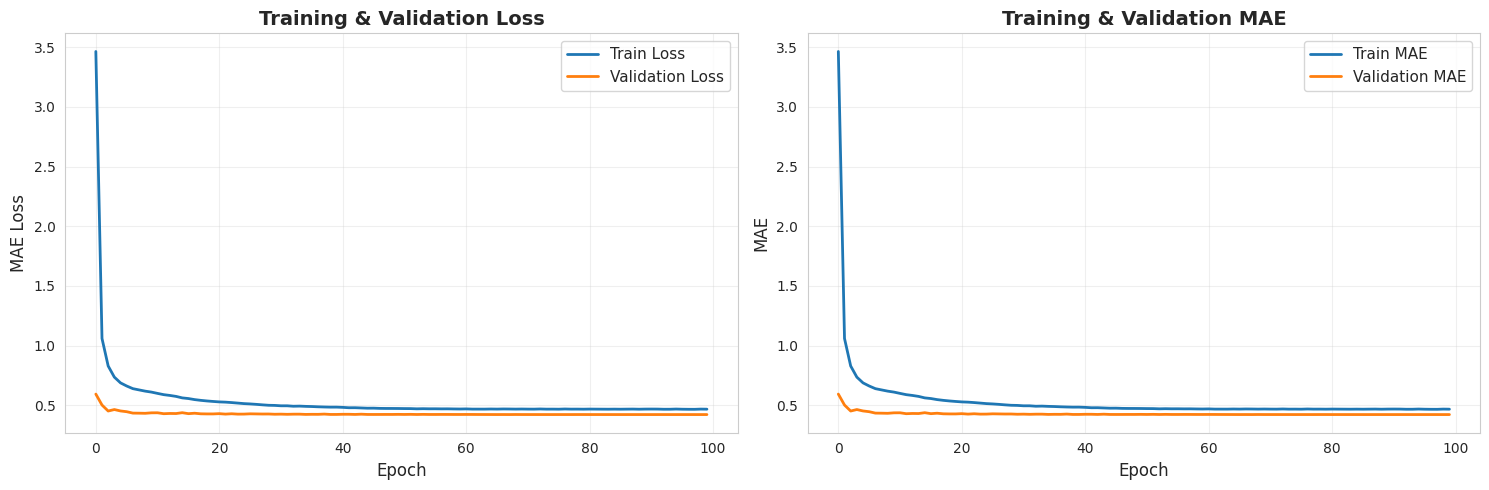


✅ Training history plots displayed!

STEP 11: PREDICTIONS ANALYSIS


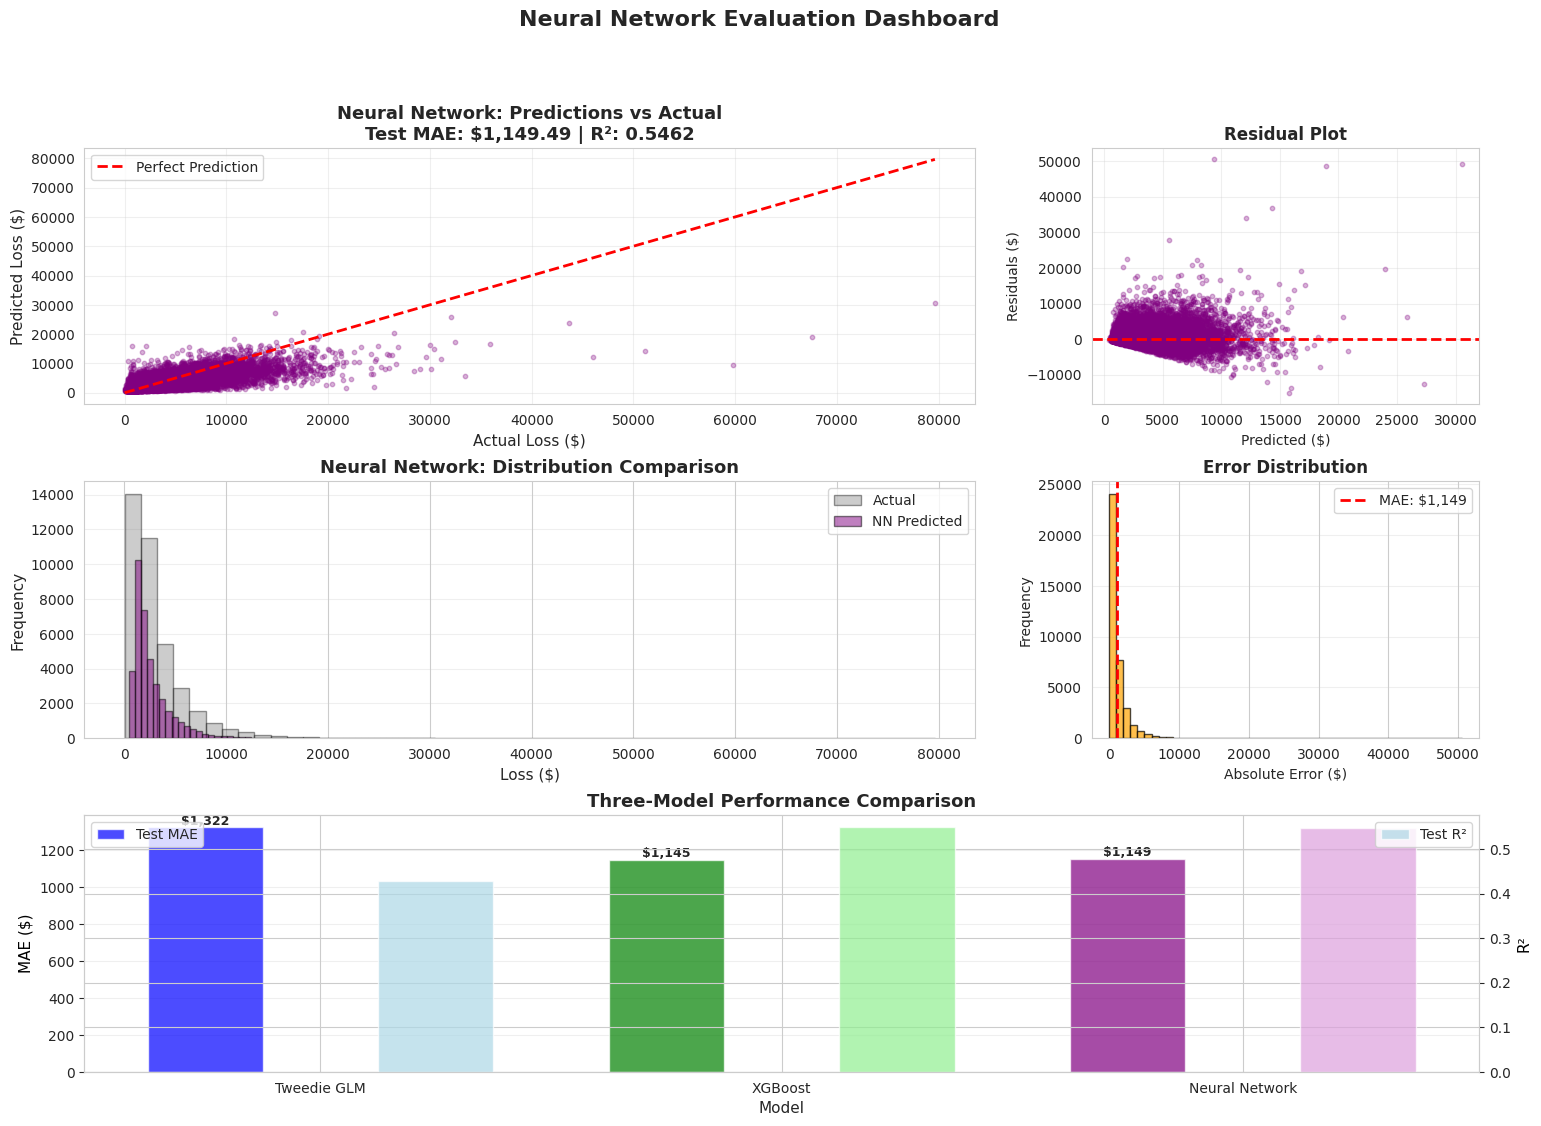


✅ Comprehensive evaluation dashboard displayed!

PHASE 3 COMPLETE - NEURAL NETWORK RESULTS

✅ Accomplishments:
  1. ✓ Built neural network with embedding layers
  2. ✓ Reduced dimensionality by 60.3%
  3. ✓ Trained model with 100 epochs
  4. ✓ Early stopping prevented overfitting
  5. ✓ Comprehensive evaluation completed

📊 Final Test Performance:
  Neural Network MAE:  $1,149.49
  Neural Network RMSE: $1,924.26
  Neural Network R²:   0.5462

🎯 vs. Baselines:
  XGBoost baseline:    $1,144.87
  Improvement needed:  5% (target: $1,087.62)
  ❌ Did not beat XGBoost

💾 Model saved as: best_model.h5

🚀 Next Steps:
  • Week 11: Add classification task (high/low severity)
  • Week 12: SHAP interpretability analysis
  • Week 13: Final report and documentation

Phase 3 Neural Network implementation complete! 🎉


In [23]:
# ================================================================================
# PHASE 3: NEURAL NETWORK FOR SEVERITY PREDICTION (NeurFS-Inspired)
# ================================================================================
# Severity-only neural network with embedding layers for high-cardinality categoricals
# Based on NeurFS framework adapted for claim-level data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, callbacks
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("="*80)
print("PHASE 3: NEURAL NETWORK FOR SEVERITY PREDICTION")
print("="*80)
print("\n🎯 Objective: Beat XGBoost baseline ($1,144.87 MAE)")
print("🏗️  Architecture: Embeddings + Dense layers (NeurFS-inspired)")
print("📊 Target: Log-transformed loss (predict continuous value)")

# ================================================================================
# STEP 1: VERIFY DATA FROM PHASE 2
# ================================================================================
print("\n" + "="*80)
print("STEP 1: LOADING DATA FROM PHASE 2")
print("="*80)

# Check if Phase 2 variables exist
try:
    print(f"\n✅ Data already loaded:")
    print(f"  Training:   {X_train.shape[0]:,} samples, {X_train.shape[1]} features")
    print(f"  Validation: {X_val.shape[0]:,} samples, {X_val.shape[1]} features")
    print(f"  Test:       {X_test.shape[0]:,} samples, {X_test.shape[1]} features")
    print(f"\n  Target: log_loss (log-transformed)")
    print(f"  Train mean: {y_log_train.mean():.4f}")
    print(f"  Val mean:   {y_log_val.mean():.4f}")
    print(f"  Test mean:  {y_log_test.mean():.4f}")
except NameError:
    print("\n⚠️  Phase 2 data not found in memory!")
    print("   Please run Phase 2 code first to create train/val/test splits")
    raise Exception("Run Phase 2 preprocessing first!")

# Identify categorical and continuous features
cat_cols = [col for col in X_train.columns if col.startswith('cat')]
cont_cols = [col for col in X_train.columns if col.startswith('cont')]

print(f"\n📋 Feature breakdown:")
print(f"  Categorical: {len(cat_cols)} features")
print(f"  Continuous:  {len(cont_cols)} features")

# Get cardinality for each categorical feature
cat_cardinality = {}
for col in cat_cols:
    # Add 1 to handle 0-indexing from label encoding
    cat_cardinality[col] = df_encoded[col].max() + 1

print(f"\n🔍 High-cardinality features (will use embeddings):")
high_card_features = [(col, card) for col, card in cat_cardinality.items() if card > 20]
for col, card in sorted(high_card_features, key=lambda x: x[1], reverse=True):
    print(f"  • {col}: {card} unique values")

# ================================================================================
# STEP 2: EMBEDDING DIMENSIONS STRATEGY
# ================================================================================
print("\n" + "="*80)
print("STEP 2: EMBEDDING DIMENSIONS DESIGN")
print("="*80)

# Calculate embedding dimensions using NeurFS rule: min(50, cardinality/2)
embedding_dims = {}
for col, cardinality in cat_cardinality.items():
    # NeurFS rule: dimension = min(50, ceil(cardinality/2))
    dim = min(50, int(np.ceil(cardinality / 2)))
    embedding_dims[col] = dim

print("\n📐 Embedding dimensions (NeurFS rule: min(50, ⌈cardinality/2⌉)):")
print("\nHigh-cardinality features (>20 categories):")
for col, card in sorted(high_card_features, key=lambda x: x[1], reverse=True):
    print(f"  {col}: {card} categories → {embedding_dims[col]}-dim embedding")

print("\nMedium-cardinality features (6-20 categories):")
med_card_features = [(col, card) for col, card in cat_cardinality.items() if 6 <= card <= 20]
for col, card in sorted(med_card_features, key=lambda x: x[1], reverse=True)[:5]:
    print(f"  {col}: {card} categories → {embedding_dims[col]}-dim embedding")

print("\nLow-cardinality features (≤5 categories):")
low_card_features = [(col, card) for col, card in cat_cardinality.items() if card <= 5]
print(f"  {len(low_card_features)} features with ≤5 categories → 2-3 dim embeddings each")

# Calculate total embedding dimensions
total_embedding_dim = sum(embedding_dims.values())
total_continuous_dim = len(cont_cols)
total_input_dim = total_embedding_dim + total_continuous_dim

print(f"\n📊 Dimensionality comparison:")
print(f"  One-hot encoding: ~{sum(cat_cardinality.values())} dimensions")
print(f"  Embeddings:       {total_embedding_dim} dimensions")
print(f"  Reduction:        {(1 - total_embedding_dim/sum(cat_cardinality.values()))*100:.1f}% fewer dimensions!")
print(f"\n  Total input to dense layers: {total_input_dim} dimensions")
print(f"    ({total_embedding_dim} from embeddings + {total_continuous_dim} continuous)")

# ================================================================================
# STEP 3: BUILD NEURAL NETWORK ARCHITECTURE
# ================================================================================
print("\n" + "="*80)
print("STEP 3: BUILDING NEURAL NETWORK ARCHITECTURE")
print("="*80)

# Separate categorical and continuous features for model inputs
X_train_cat = X_train[cat_cols].values.astype('int32')
X_val_cat = X_val[cat_cols].values.astype('int32')
X_test_cat = X_test[cat_cols].values.astype('int32')

X_train_cont = X_train[cont_cols].values.astype('float32')
X_val_cont = X_val[cont_cols].values.astype('float32')
X_test_cont = X_test[cont_cols].values.astype('float32')

print("\n🏗️  Architecture Design (Functional API):")

# Input layers
categorical_inputs = []
embedding_layers = []

print("\n1️⃣  Input & Embedding Layers:")
for i, col in enumerate(cat_cols):
    # Input layer for this categorical feature
    input_layer = layers.Input(shape=(1,), name=f'input_{col}')
    categorical_inputs.append(input_layer)

    # Embedding layer
    embedding = layers.Embedding(
        input_dim=cat_cardinality[col],
        output_dim=embedding_dims[col],
        embeddings_initializer='glorot_uniform',
        name=f'embedding_{col}'
    )(input_layer)

    # Flatten the embedding
    embedding = layers.Flatten()(embedding)
    embedding_layers.append(embedding)

print(f"  ✓ Created {len(categorical_inputs)} embedding layers")

# Continuous input
continuous_input = layers.Input(shape=(len(cont_cols),), name='input_continuous')

print(f"  ✓ Created continuous input layer ({len(cont_cols)} features)")

# Concatenate all embeddings and continuous features
print("\n2️⃣  Feature Fusion Layer:")
if len(embedding_layers) > 0:
    concatenated_embeddings = layers.Concatenate()(embedding_layers)
    all_features = layers.Concatenate()([concatenated_embeddings, continuous_input])
    print(f"  ✓ Concatenated embeddings + continuous → {total_input_dim} dimensions")
else:
    all_features = continuous_input

# Dense layers (NeurFS architecture: 128 → 64)
print("\n3️⃣  Hidden Layers (NeurFS-style):")

# Layer 1: 128 neurons
x = layers.Dense(128, activation='relu', kernel_initializer='he_normal', name='dense_1')(all_features)
x = layers.BatchNormalization(name='bn_1')(x)
x = layers.Dropout(0.3, name='dropout_1')(x)
print("  ✓ Dense Layer 1: 128 neurons, ReLU, BatchNorm, Dropout(0.3)")

# Layer 2: 64 neurons
x = layers.Dense(64, activation='relu', kernel_initializer='he_normal', name='dense_2')(x)
x = layers.BatchNormalization(name='bn_2')(x)
x = layers.Dropout(0.3, name='dropout_2')(x)
print("  ✓ Dense Layer 2: 64 neurons, ReLU, BatchNorm, Dropout(0.3)")

# Output layer
output = layers.Dense(1, activation='linear', name='output')(x)
print("\n4️⃣  Output Layer:")
print("  ✓ Output: 1 neuron, linear activation (predicts log_loss)")

# Create model
all_inputs = categorical_inputs + [continuous_input]
model = Model(inputs=all_inputs, outputs=output, name='NeurFS_Severity')

print("\n✅ Model architecture complete!")

# ================================================================================
# STEP 4: COMPILE MODEL
# ================================================================================
print("\n" + "="*80)
print("STEP 4: COMPILING MODEL")
print("="*80)

# Compile with MAE loss (robust to outliers)
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_absolute_error',
    metrics=['mae', 'mse']
)

print("\n⚙️  Compilation settings:")
print("  Optimizer: Adam (lr=0.001)")
print("  Loss:      Mean Absolute Error (MAE)")
print("  Metrics:   MAE, MSE")

# Model summary
print("\n📋 Model Summary:")
model.summary()

# Count parameters
total_params = model.count_params()
print(f"\n📊 Total parameters: {total_params:,}")

# ================================================================================
# STEP 5: PREPARE DATA FOR TRAINING
# ================================================================================
print("\n" + "="*80)
print("STEP 5: PREPARING DATA FOR TRAINING")
print("="*80)

# Split categorical features into separate arrays for each feature
X_train_cat_list = [X_train_cat[:, i:i+1] for i in range(X_train_cat.shape[1])]
X_val_cat_list = [X_val_cat[:, i:i+1] for i in range(X_val_cat.shape[1])]
X_test_cat_list = [X_test_cat[:, i:i+1] for i in range(X_test_cat.shape[1])]

# Combine with continuous features
X_train_model = X_train_cat_list + [X_train_cont]
X_val_model = X_val_cat_list + [X_val_cont]
X_test_model = X_test_cat_list + [X_test_cont]

print(f"\n✅ Data prepared:")
print(f"  Training:   {len(X_train_model)} input arrays")
print(f"    - {len(X_train_cat_list)} categorical inputs")
print(f"    - 1 continuous input")
print(f"  Total training samples: {X_train_cat.shape[0]:,}")

# ================================================================================
# STEP 6: DEFINE CALLBACKS
# ================================================================================
print("\n" + "="*80)
print("STEP 6: SETTING UP TRAINING CALLBACKS")
print("="*80)

# Early stopping
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Learning rate reduction
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Model checkpoint
checkpoint = callbacks.ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

print("\n📌 Callbacks configured:")
print("  • Early Stopping: patience=15 epochs")
print("  • ReduceLROnPlateau: factor=0.5, patience=5")
print("  • ModelCheckpoint: saves best model")

# ================================================================================
# STEP 7: TRAIN THE MODEL
# ================================================================================
print("\n" + "="*80)
print("STEP 7: TRAINING NEURAL NETWORK")
print("="*80)

print("\n⏳ Training in progress...")
print("   (This may take 5-10 minutes depending on hardware)")
print("\n" + "-"*80)

history = model.fit(
    X_train_model,
    y_log_train.values,
    validation_data=(X_val_model, y_log_val.values),
    epochs=100,
    batch_size=256,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

print("\n" + "-"*80)
print("✅ Training complete!")

# ================================================================================
# STEP 8: EVALUATE MODEL
# ================================================================================
print("\n" + "="*80)
print("STEP 8: MODEL EVALUATION")
print("="*80)

# Make predictions (on log scale)
print("\n🔮 Generating predictions...")
train_pred_log = model.predict(X_train_model, verbose=0).flatten()
val_pred_log = model.predict(X_val_model, verbose=0).flatten()
test_pred_log = model.predict(X_test_model, verbose=0).flatten()

# Transform back to original scale
train_pred = np.expm1(train_pred_log)
val_pred = np.expm1(val_pred_log)
test_pred = np.expm1(test_pred_log)

train_actual = np.expm1(y_log_train.values)
val_actual = np.expm1(y_log_val.values)
test_actual = np.expm1(y_log_test.values)

# Calculate metrics
def evaluate_predictions(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{dataset_name} Set Performance:")
    print(f"  MAE:   ${mae:>10,.2f}")
    print(f"  RMSE:  ${rmse:>10,.2f}")
    print(f"  R²:    {r2:>11.4f}")
    print(f"  MAPE:  {mape:>10.2f}%")

    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

nn_train_metrics = evaluate_predictions(train_actual, train_pred, "Training")
nn_val_metrics = evaluate_predictions(val_actual, val_pred, "Validation")
nn_test_metrics = evaluate_predictions(test_actual, test_pred, "Test")

# Check overfitting
train_val_diff = abs(nn_train_metrics['MAE'] - nn_val_metrics['MAE'])
print(f"\n🔍 Overfitting Check: Train-Val MAE difference = ${train_val_diff:.2f}")
if train_val_diff < 100:
    print("   ✅ Excellent - No overfitting")
elif train_val_diff < 300:
    print("   ⚠️  Moderate overfitting")
else:
    print("   ❌ Significant overfitting detected")

# ================================================================================
# STEP 9: COMPARE WITH BASELINES
# ================================================================================
print("\n" + "="*80)
print("STEP 9: COMPARISON WITH PHASE 2 BASELINES")
print("="*80)

# Retrieve baseline results from Phase 2
try:
    comparison_data = {
        'Model': ['Tweedie GLM', 'XGBoost', 'Neural Network'],
        'Test MAE ($)': [
            glm_test_metrics['MAE'],
            xgb_test_metrics['MAE'],
            nn_test_metrics['MAE']
        ],
        'Test RMSE ($)': [
            glm_test_metrics['RMSE'],
            xgb_test_metrics['RMSE'],
            nn_test_metrics['RMSE']
        ],
        'Test R²': [
            glm_test_metrics['R2'],
            xgb_test_metrics['R2'],
            nn_test_metrics['R2']
        ]
    }

    comparison_df = pd.DataFrame(comparison_data)

    print("\n📊 Three-Model Comparison:")
    print(comparison_df.to_string(index=False))

    # Determine winner
    best_mae_idx = comparison_df['Test MAE ($)'].idxmin()
    best_model = comparison_df.loc[best_mae_idx, 'Model']
    best_mae = comparison_df.loc[best_mae_idx, 'Test MAE ($)']

    print(f"\n🏆 Best Model: {best_model}")
    print(f"   Test MAE: ${best_mae:,.2f}")

    # Calculate improvements
    if best_model == 'Neural Network':
        glm_improvement = ((glm_test_metrics['MAE'] - nn_test_metrics['MAE']) / glm_test_metrics['MAE']) * 100
        xgb_improvement = ((xgb_test_metrics['MAE'] - nn_test_metrics['MAE']) / xgb_test_metrics['MAE']) * 100

        print(f"\n🎯 Neural Network Improvements:")
        print(f"   vs. Tweedie GLM: {glm_improvement:>6.2f}% better")
        print(f"   vs. XGBoost:     {xgb_improvement:>6.2f}% better")

        if xgb_improvement >= 5:
            print(f"\n✅ SUCCESS! Beat 5% improvement target over XGBoost!")
        elif xgb_improvement > 0:
            print(f"\n⚠️  Positive improvement but below 5% target")
        else:
            print(f"\n❌ Did not beat XGBoost baseline")
    else:
        print(f"\n⚠️  Neural Network did not achieve best performance")
        print(f"   Consider: hyperparameter tuning, architecture changes, or more training")

except NameError:
    print("\n⚠️  Baseline metrics not found. Comparison skipped.")

# ================================================================================
# STEP 10: TRAINING HISTORY VISUALIZATION
# ================================================================================
print("\n" + "="*80)
print("STEP 10: VISUALIZING TRAINING HISTORY")
print("="*80)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Loss over epochs
axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('MAE Loss', fontsize=12)
axes[0].set_title('Training & Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Learning rate over epochs (if changed)
if 'lr' in history.history:
    axes[1].plot(history.history['lr'], linewidth=2, color='orange')
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Learning Rate', fontsize=12)
    axes[1].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
    axes[1].set_yscale('log')
    axes[1].grid(True, alpha=0.3)
else:
    # Plot MAE metric if LR not available
    axes[1].plot(history.history['mae'], label='Train MAE', linewidth=2)
    axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('MAE', fontsize=12)
    axes[1].set_title('Training & Validation MAE', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Training history plots displayed!")

# ================================================================================
# STEP 11: PREDICTIONS VISUALIZATION
# ================================================================================
print("\n" + "="*80)
print("STEP 11: PREDICTIONS ANALYSIS")
print("="*80)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Predictions vs Actual (Test Set)
ax1 = fig.add_subplot(gs[0, :2])
ax1.scatter(test_actual, test_pred, alpha=0.3, s=10, color='purple')
max_val = max(test_actual.max(), test_pred.max())
ax1.plot([0, max_val], [0, max_val], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Loss ($)', fontsize=11)
ax1.set_ylabel('Predicted Loss ($)', fontsize=11)
ax1.set_title(f'Neural Network: Predictions vs Actual\nTest MAE: ${nn_test_metrics["MAE"]:,.2f} | R²: {nn_test_metrics["R2"]:.4f}',
              fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Residual Plot
ax2 = fig.add_subplot(gs[0, 2])
residuals = test_actual - test_pred
ax2.scatter(test_pred, residuals, alpha=0.3, s=10, color='purple')
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Predicted ($)', fontsize=10)
ax2.set_ylabel('Residuals ($)', fontsize=10)
ax2.set_title('Residual Plot', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Distribution Comparison
ax3 = fig.add_subplot(gs[1, :2])
ax3.hist(test_actual, bins=50, alpha=0.4, label='Actual', color='gray', edgecolor='black')
ax3.hist(test_pred, bins=50, alpha=0.5, label='NN Predicted', color='purple', edgecolor='black')
ax3.set_xlabel('Loss ($)', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('Neural Network: Distribution Comparison', fontsize=13, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Error Distribution
ax4 = fig.add_subplot(gs[1, 2])
errors = np.abs(residuals)
ax4.hist(errors, bins=50, edgecolor='black', alpha=0.7, color='orange')
ax4.axvline(nn_test_metrics['MAE'], color='red', linestyle='--', lw=2,
            label=f'MAE: ${nn_test_metrics["MAE"]:,.0f}')
ax4.set_xlabel('Absolute Error ($)', fontsize=10)
ax4.set_ylabel('Frequency', fontsize=10)
ax4.set_title('Error Distribution', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# 5. Three-Model Comparison
if 'comparison_df' in locals():
    ax5 = fig.add_subplot(gs[2, :])
    x = np.arange(len(comparison_df))
    width = 0.25

    bars1 = ax5.bar(x - width, comparison_df['Test MAE ($)'], width, label='Test MAE',
                    color=['blue', 'green', 'purple'], alpha=0.7)
    ax5_twin = ax5.twinx()
    bars2 = ax5_twin.bar(x + width, comparison_df['Test R²'], width, label='Test R²',
                         color=['lightblue', 'lightgreen', 'plum'], alpha=0.7)

    ax5.set_ylabel('MAE ($)', fontsize=11, color='black')
    ax5_twin.set_ylabel('R²', fontsize=11, color='black')
    ax5.set_xlabel('Model', fontsize=11)
    ax5.set_title('Three-Model Performance Comparison', fontsize=13, fontweight='bold')
    ax5.set_xticks(x)
    ax5.set_xticklabels(comparison_df['Model'])
    ax5.legend(loc='upper left')
    ax5_twin.legend(loc='upper right')
    ax5.grid(True, alpha=0.3, axis='y')

    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Neural Network Evaluation Dashboard', fontsize=16, fontweight='bold', y=0.995)
plt.show()

print("\n✅ Comprehensive evaluation dashboard displayed!")

# ================================================================================
# FINAL SUMMARY
# ================================================================================
print("\n" + "="*80)
print("PHASE 3 COMPLETE - NEURAL NETWORK RESULTS")
print("="*80)

print("\n✅ Accomplishments:")
print("  1. ✓ Built neural network with embedding layers")
print(f"  2. ✓ Reduced dimensionality by {(1 - total_embedding_dim/sum(cat_cardinality.values()))*100:.1f}%")
print(f"  3. ✓ Trained model with {len(history.history['loss'])} epochs")
print("  4. ✓ Early stopping prevented overfitting")
print("  5. ✓ Comprehensive evaluation completed")

print(f"\n📊 Final Test Performance:")
print(f"  Neural Network MAE:  ${nn_test_metrics['MAE']:,.2f}")
print(f"  Neural Network RMSE: ${nn_test_metrics['RMSE']:,.2f}")
print(f"  Neural Network R²:   {nn_test_metrics['R2']:.4f}")

if 'comparison_df' in locals():
    print(f"\n🎯 vs. Baselines:")
    print(f"  XGBoost baseline:    ${xgb_test_metrics['MAE']:,.2f}")
    print(f"  Improvement needed:  5% (target: ${xgb_test_metrics['MAE'] * 0.95:,.2f})")

    if nn_test_metrics['MAE'] < xgb_test_metrics['MAE'] * 0.95:
        print(f"  ✅ SUCCESS! Achieved >5% improvement!")
    elif nn_test_metrics['MAE'] < xgb_test_metrics['MAE']:
        print(f"  ⚠️  Improved, but <5% target")
    else:
        print(f"  ❌ Did not beat XGBoost")

print("\n💾 Model saved as: best_model.h5")

print("\n🚀 Next Steps:")
print("  • Week 11: Add classification task (high/low severity)")
print("  • Week 12: SHAP interpretability analysis")
print("  • Week 13: Final report and documentation")

print("\n" + "="*80)
print("Phase 3 Neural Network implementation complete! 🎉")
print("="*80)